# Austin

In [1]:
import pandas as pd
import numpy as np

In [15]:
calendar = pd.read_csv('calendar.csv')

In [185]:
listings = pd.read_csv('listings.csv')
listings_detailed = pd.read_csv('listings_detailed.csv')
neighbor = pd.read_csv('neighbourhoods.csv')
neighbor_json = pd.read_json('neighbourhoods.geojson')
review = pd.read_csv('reviews.csv')
review_detailed = pd.read_csv('reviews_detailed.csv')

# Calendar

In [16]:
calendar

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2023-03-16,f,$200.00,$200.00,2.0,90.0
1,5456,2023-03-17,f,$250.00,$250.00,2.0,90.0
2,5456,2023-03-18,f,$250.00,$250.00,2.0,90.0
3,5456,2023-03-19,t,$250.00,$250.00,2.0,90.0
4,5456,2023-03-20,f,$95.00,$95.00,2.0,90.0
...,...,...,...,...,...,...,...
5243968,847304715126157738,2024-03-10,t,$218.00,$218.00,7.0,365.0
5243969,847304715126157738,2024-03-11,t,$178.00,$178.00,7.0,365.0
5243970,847304715126157738,2024-03-12,t,$166.00,$166.00,7.0,365.0
5243971,847304715126157738,2024-03-13,t,$184.00,$184.00,7.0,365.0


In [23]:
import pandas as pd

def simple_eda(df):
    # Set display format to avoid scientific notation, adjust precision as needed
    pd.set_option('display.float_format', lambda x: '%.3f' % x)

    # Basic structure
    print("Basic Structure:")
    print(f"Number of Rows: {df.shape[0]}")
    print(f"Number of Columns: {df.shape[1]}\n")

    # Missing values
    print("Missing Values by Column:")
    print(df.isnull().sum(), "\n")

    # Data types
    print("Data Types:")
    print(df.dtypes, "\n")

    # Unique values by column
    print("Unique Values by Column:")
    for column in df.columns:
        print(f"{column}: {df[column].nunique()}")
    print("\n")

    # Summary statistics for numerical columns
    print("Summary Statistics for Numerical Columns:")
    print(df.describe(), "\n")

    # Details on categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print("Categorical Columns Details:")
        for col in categorical_cols:
            print(f"Column '{col}' unique values:")
            print(df[col].unique())
    else:
        print("No categorical columns found.")


In [24]:
simple_eda(calendar)

Basic Structure:
Number of Rows: 5243973
Number of Columns: 7

Missing Values by Column:
listing_id          0
date                0
available           0
price             171
adjusted_price    171
minimum_nights      1
maximum_nights      1
dtype: int64 

Data Types:
listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object 

Unique Values by Column:
listing_id: 14367
date: 380
available: 2
price: 4803
adjusted_price: 4799
minimum_nights: 72
maximum_nights: 390


Summary Statistics for Numerical Columns:
                  listing_id  minimum_nights  maximum_nights
count            5243973.000     5243972.000     5243972.000
mean  269445108794571168.000          10.806     3674510.410
std   349573732760656192.000          41.565    88745880.520
min                 5456.000           1.000           1.000
25%             23328949.000           2.000 

## Look at same listing_id

In [33]:
id_5456 = calendar.loc[calendar['listing_id'] == 5456]
id_5456


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,5456,2023-03-16,f,$200.00,$200.00,2.000,90.000
1,5456,2023-03-17,f,$250.00,$250.00,2.000,90.000
2,5456,2023-03-18,f,$250.00,$250.00,2.000,90.000
3,5456,2023-03-19,t,$250.00,$250.00,2.000,90.000
4,5456,2023-03-20,f,$95.00,$95.00,2.000,90.000
...,...,...,...,...,...,...,...
360,5456,2024-03-10,t,$95.00,$95.00,2.000,90.000
361,5456,2024-03-11,t,$95.00,$95.00,2.000,90.000
362,5456,2024-03-12,t,$95.00,$95.00,2.000,90.000
363,5456,2024-03-13,t,$95.00,$95.00,2.000,90.000


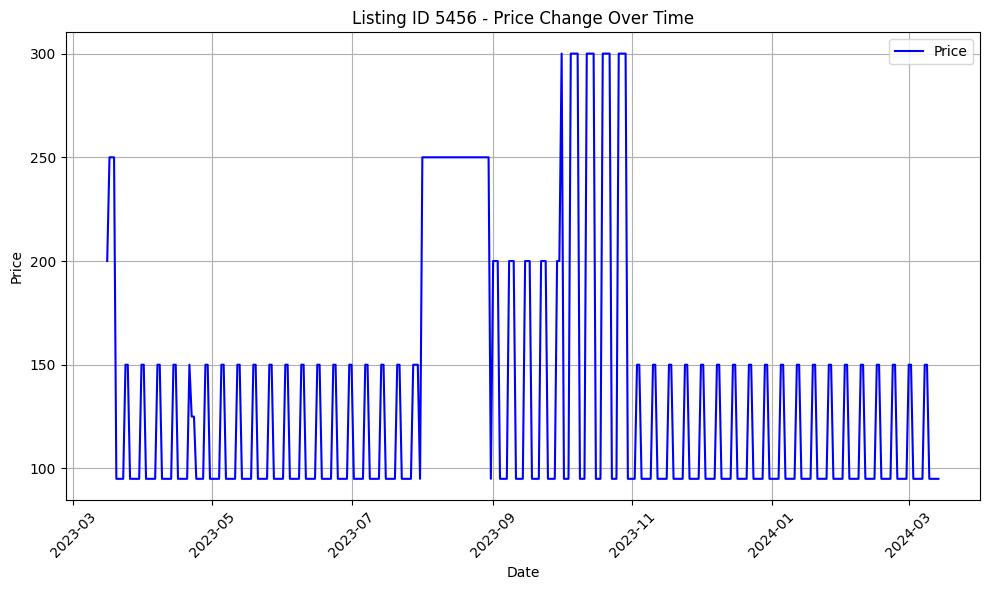

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame named df
# Convert 'date' column to datetime format
id_5456['date'] = pd.to_datetime(id_5456['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_5456['price'] = id_5456['price'].replace('[\$,]', '', regex=True).astype(float)
id_5456['adjusted_price'] = id_5456['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Sort DataFrame by 'date'
id_5456 = id_5456.sort_values(by='date')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_5456['date'], id_5456['price'], linestyle='-', label='Price',  color='blue')
plt.title('Listing ID 5456 - Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


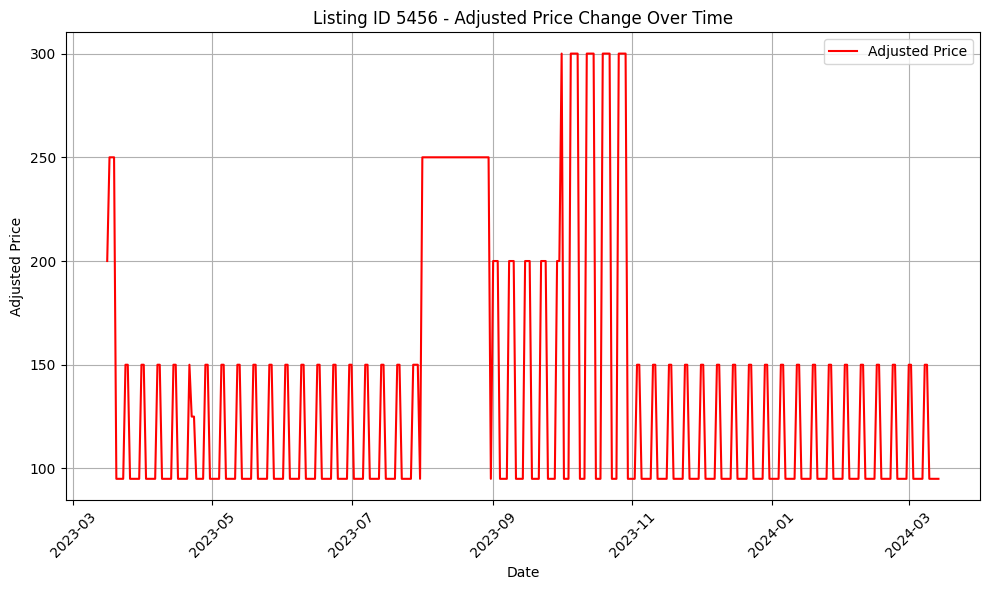

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the data in a DataFrame named df
# Convert 'date' column to datetime format
id_5456['date'] = pd.to_datetime(id_5456['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_5456['adjusted_price'] = id_5456['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Sort DataFrame by 'date'
id_5456 = id_5456.sort_values(by='date')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_5456['date'], id_5456['adjusted_price'], linestyle='-', label='Adjusted Price',  color='red')
plt.title('Listing ID 5456 - Adjusted Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


### Any difference in Price VS Adjusted_Price?

In [51]:
# Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
id_5456['price'] = id_5456['price'].replace('[\$,]', '', regex=True).astype(float)
id_5456['adjusted_price'] = id_5456['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
id_5456['price_difference'] = id_5456['price'] - id_5456['adjusted_price']

# Display rows where there is a difference
print(len(id_5456[id_5456['price_difference'] != 0]))

0


### Does Availability Change the Price?


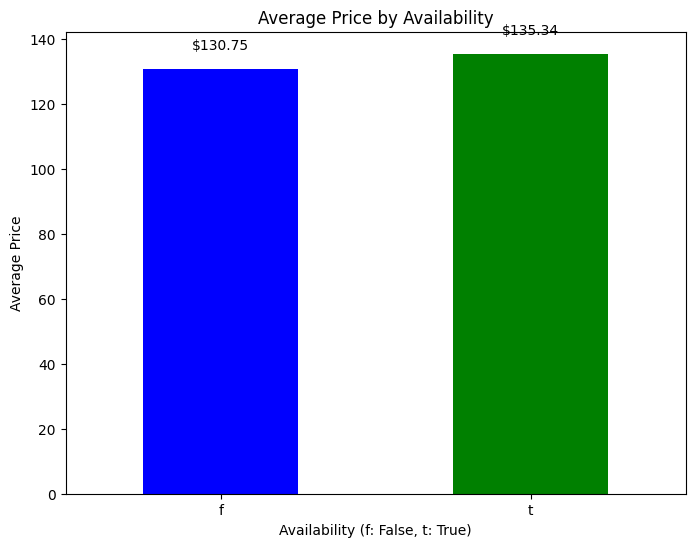

In [56]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
id_5456['price'] = id_5456['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = id_5456.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Time Series of Date and Availability

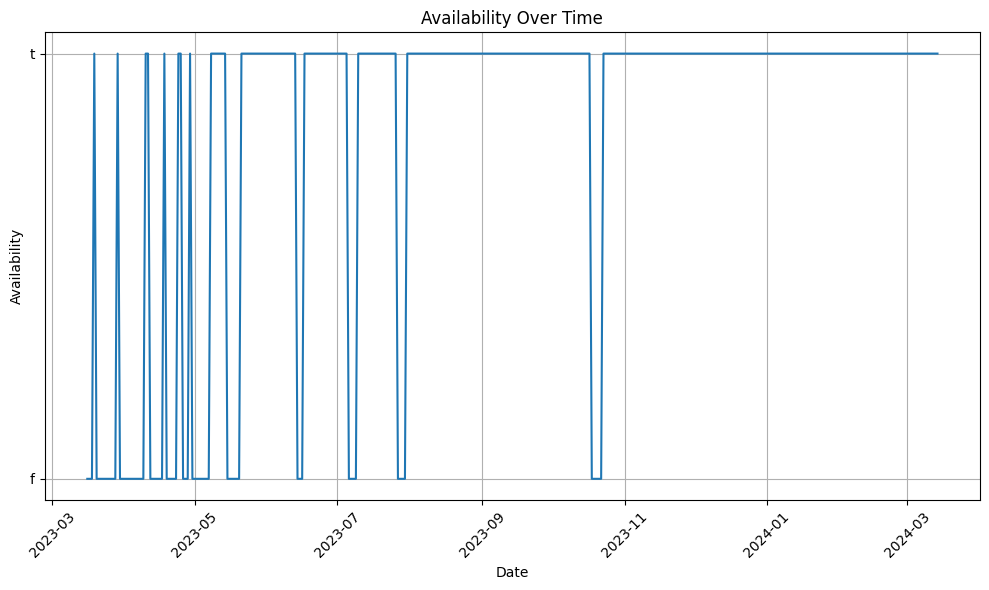

In [59]:

# Convert 'date' column to datetime format
id_5456['date'] = pd.to_datetime(id_5456['date'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(id_5456['date'], id_5456['available'], linestyle='-')
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Availability')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


<Figure size 1000x600 with 0 Axes>

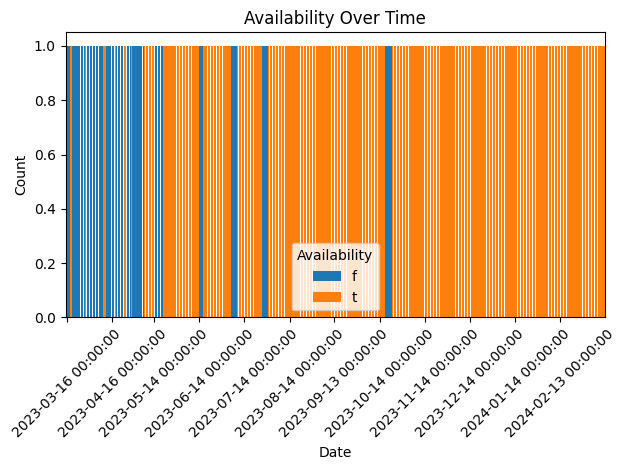

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator

# Convert 'date' column to datetime format
#id_5456['date'] = pd.to_datetime(id_5456['date'])

# Count the number of occurrences of each availability status for each date
availability_counts = id_5456.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True, width=0.8)
plt.title('Availability Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Availability')

# Set x-axis ticks to be one month apart
plt.gca().xaxis.set_major_locator(MonthLocator())

plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


## With the Whole dataset

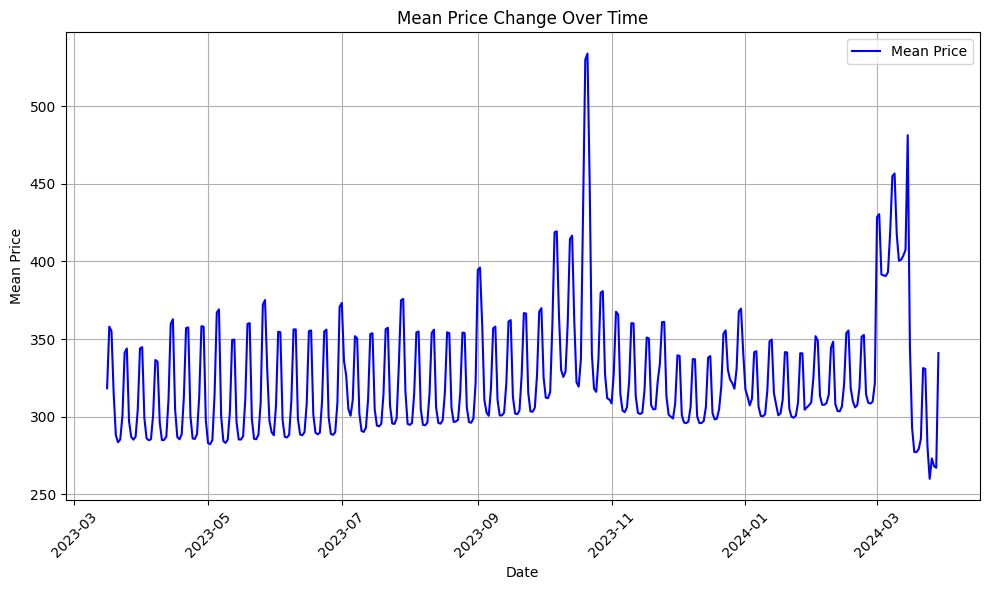

In [69]:
# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = calendar.groupby('date')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.title('Mean Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

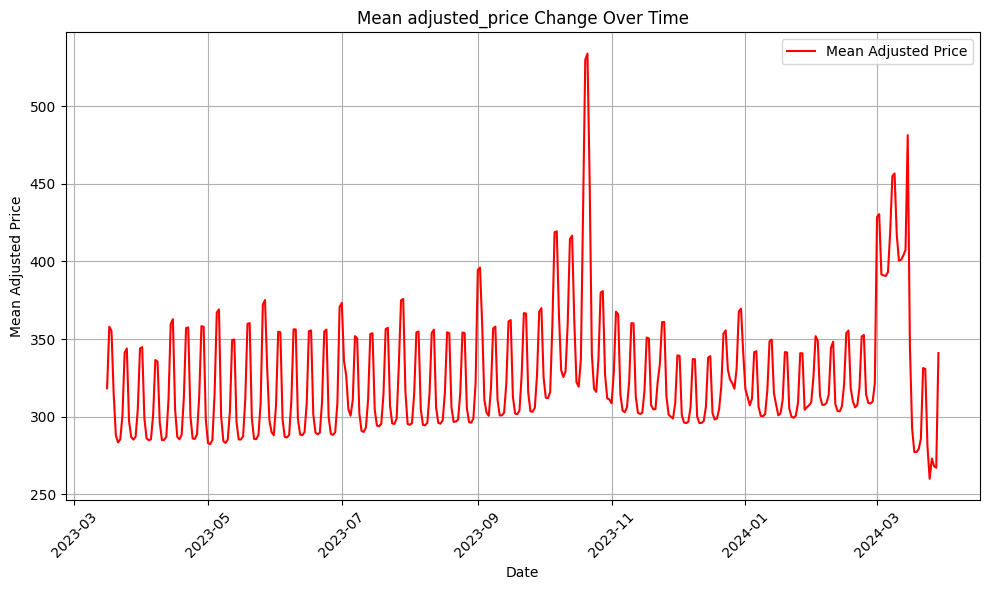

In [73]:
# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_adjusted_price_by_date = calendar.groupby('date')['adjusted_price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')
plt.title('Mean adjusted_price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Adjusted Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

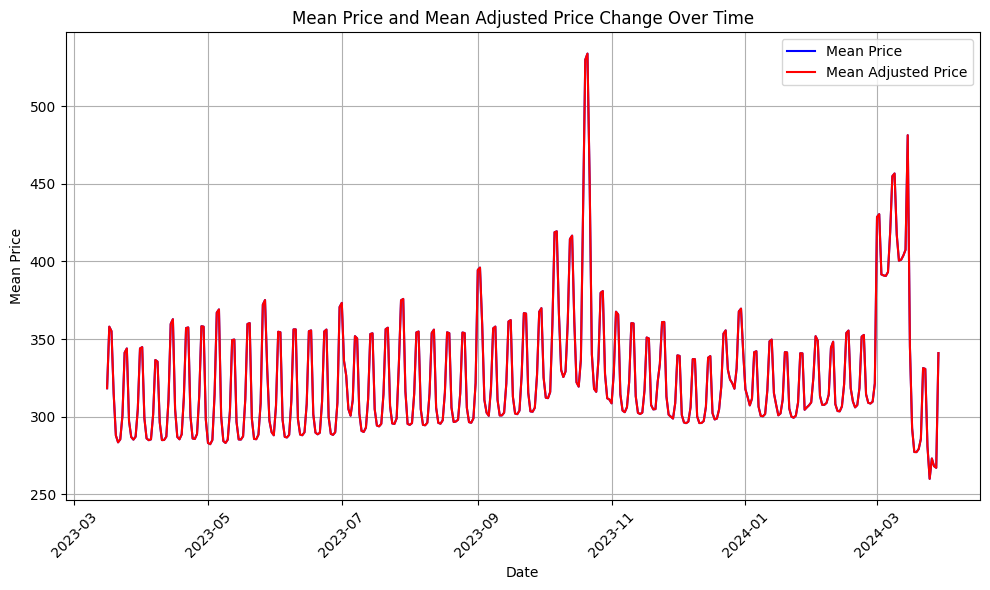

In [74]:

calendar['date'] = pd.to_datetime(calendar['date'])

# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean price for each day
mean_price_by_date = calendar.groupby('date')['price'].mean()

# Convert 'adjusted_price' column to numeric after removing the dollar sign and converting to float
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'date' and calculate the mean adjusted price for each day
mean_adjusted_price_by_date = calendar.groupby('date')['adjusted_price'].mean()

# Plotting both mean price and mean adjusted price on the same plot
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_date.index, mean_price_by_date.values, linestyle='-', label='Mean Price', color='blue')
plt.plot(mean_adjusted_price_by_date.index, mean_adjusted_price_by_date.values, linestyle='-', label='Mean Adjusted Price', color='red')

plt.title('Mean Price and Mean Adjusted Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [76]:
# Convert 'price' and 'adjusted_price' columns to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)
calendar['adjusted_price'] = calendar['adjusted_price'].replace('[\$,]', '', regex=True).astype(float)

# Check if there is any difference between 'price' and 'adjusted_price' columns in the same row
calendar['price_difference'] = calendar['price'] - calendar['adjusted_price']

# Display rows where there is a difference
print(len(calendar[calendar['price_difference'] != 0]))

171


### Does Availability Change the Price?

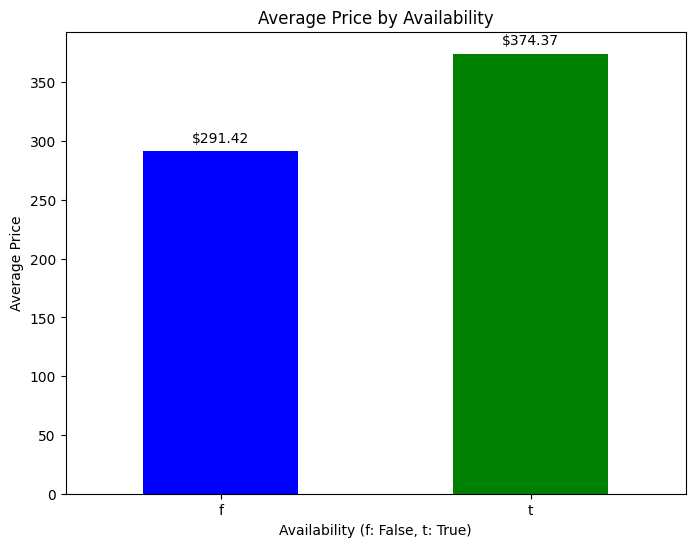

In [77]:
# Convert 'price' column to numeric after removing the dollar sign and converting to float
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Group the data by 'available' and calculate the mean price for each group
price_by_available = calendar.groupby('available')['price'].mean()

# Plotting
plt.figure(figsize=(8, 6))
price_by_available.plot(kind='bar', color=['blue', 'green'])

# Display actual average price values on the bars
for i, v in enumerate(price_by_available):
    plt.text(i, v + 5, f"${v:.2f}", ha='center', va='bottom')

plt.title('Average Price by Availability')
plt.xlabel('Availability (f: False, t: True)')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()

### Time Series of Date and Availability

<Figure size 1000x600 with 0 Axes>

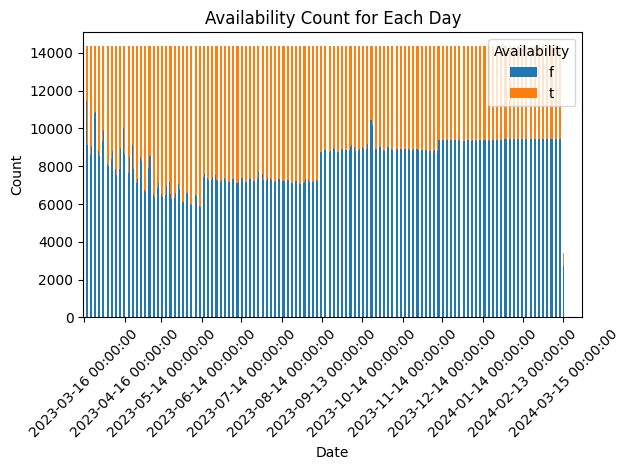

In [81]:

import matplotlib.dates as mdates

# Assuming you have the data in a DataFrame named calendar
calendar['date'] = pd.to_datetime(calendar['date'])

# Group the data by 'date' and 'available', and count occurrences
availability_counts = calendar.groupby(['date', 'available']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
availability_counts.plot(kind='bar', stacked=True)

# Set the x-axis tick locator to show labels for each month
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.title('Availability Count for Each Day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Availability')
plt.tight_layout()

# Show plot
plt.show()


# Listings

In [85]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,NaN,78702,30.261,-97.734,Entire home/apt,176,2,630,2023-03-02,3.690,2,298,45,NaN
1,5769,NW Austin Room,8186,Elizabeth,NaN,78729,30.457,-97.784,Private room,42,1,275,2023-01-30,1.750,1,0,11,NaN
2,6413,Gem of a Studio near Downtown,13879,Todd,NaN,78704,30.249,-97.736,Entire home/apt,109,30,122,2022-10-17,0.760,1,0,5,NaN
3,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,NaN,78704,30.260,-97.765,Entire home/apt,240,3,295,2023-03-09,2.100,1,133,27,NaN
4,8502,Woodland Studio Lodging,25298,Karen,NaN,78741,30.235,-97.737,Entire home/apt,85,4,48,2021-11-13,0.300,1,36,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,847159076072987428,Central Austin Bungalow!,276920863,Susana,NaN,78705,30.289,-97.747,Entire home/apt,129,2,0,NaN,NaN,41,129,0,NaN
14364,847171709264672413,Fresh Austin Studio Apartment!,276920863,Susana,NaN,78705,30.290,-97.749,Entire home/apt,54,2,0,NaN,NaN,41,131,0,NaN
14365,847178203609366885,Quaint Austin Condo!,276920863,Susana,NaN,78705,30.287,-97.727,Entire home/apt,145,2,0,NaN,NaN,41,37,0,NaN
14366,847256590826352221,NEW! Aqua Azul Outdoors - Near Lake Travis,499116561,Edwin,NaN,78734,30.382,-97.953,Entire home/apt,144,2,0,NaN,NaN,1,265,0,NaN


In [86]:
simple_eda(listings)

Basic Structure:
Number of Rows: 14368
Number of Columns: 18

Missing Values by Column:
id                                    0
name                                  0
host_id                               0
host_name                             2
neighbourhood_group               14368
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        3031
reviews_per_month                  3031
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           14368
dtype: int64 

Data Types:
id                                  int64
name                               object
host_id                             int64
host_name                          obje

## Room Type Distribution

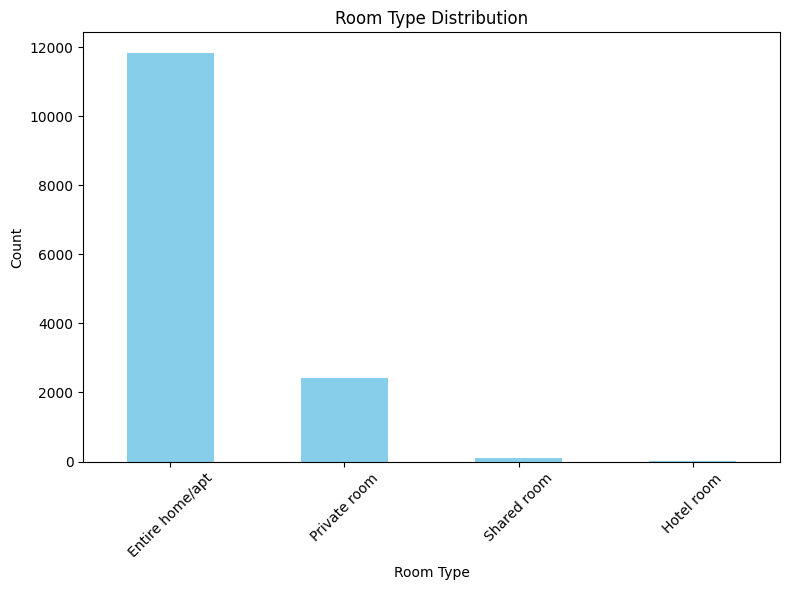

In [87]:
import matplotlib.pyplot as plt

# Plotting Room Type Distribution
plt.figure(figsize=(8, 6))
listings['room_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Price Distribution

#### Whole DF

In [99]:
print("Min Price:", min(listings['price']))
print("Max Price:", max(listings['price']))
print("Avg Price:", listings['price'].mean())
print("Median Price:", listings['price'].median())

Min Price: 0
Max Price: 65155
Avg Price: 310.0299276169265
Median Price: 180.0


#### For each room type

In [100]:
import pandas as pd

# Group by room type and calculate statistics
room_type_stats = listings.groupby('room_type')['price'].agg(['min', 'max', 'mean', 'median'])

# Print statistics for each room type
for room_type, stats in room_type_stats.iterrows():
    print(f"Room Type: {room_type}")
    print(f"Min Price: {stats['min']}")
    print(f"Max Price: {stats['max']}")
    print(f"Avg Price: {stats['mean']}")
    print(f"Median Price: {stats['median']}")
    print()


Room Type: Entire home/apt
Min Price: 1.0
Max Price: 65155.0
Avg Price: 339.17027209734664
Median Price: 201.0

Room Type: Hotel room
Min Price: 0.0
Max Price: 3350.0
Avg Price: 786.75
Median Price: 210.0

Room Type: Private room
Min Price: 5.0
Max Price: 25000.0
Avg Price: 176.55357881671495
Median Price: 75.0

Room Type: Shared room
Min Price: 15.0
Max Price: 700.0
Avg Price: 71.05504587155963
Median Price: 31.0



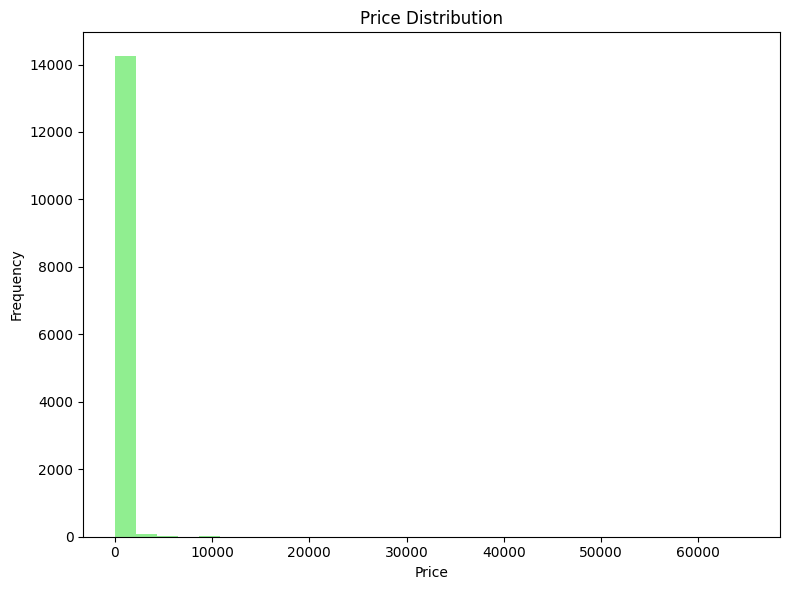

In [104]:
# Plotting Price Distribution
plt.figure(figsize=(8, 6))
plt.hist(listings['price'], bins=30, color='lightgreen')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Pricing Dist for each room type

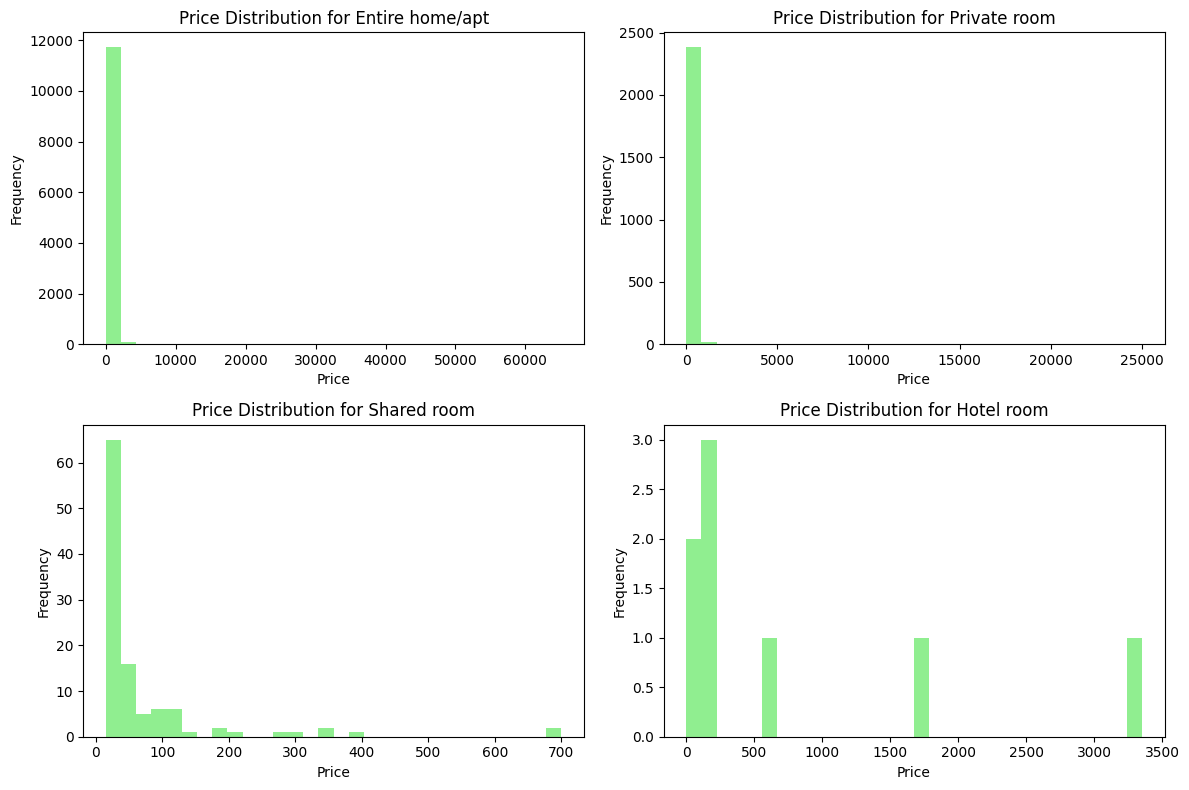

In [90]:
# Unique room types
room_types = listings['room_type'].unique()

# Plotting Price Distribution for each room type
plt.figure(figsize=(12, 8))

for i, room_type in enumerate(room_types, start=1):
    plt.subplot(2, 2, i)
    plt.hist(listings[listings['room_type'] == room_type]['price'], bins=30, color='lightgreen')
    plt.title(f'Price Distribution for {room_type}')
    plt.xlabel('Price')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Neighborhood Distribution

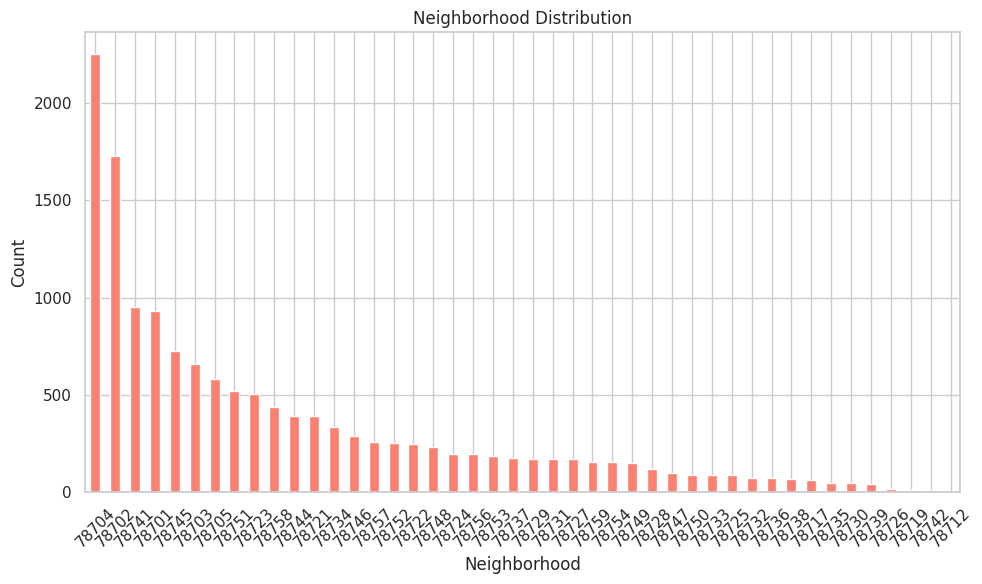

In [125]:
neighborhood_counts = listings['neighbourhood'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='salmon')
plt.title('Neighborhood Distribution')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Price Dist for each neighborhood

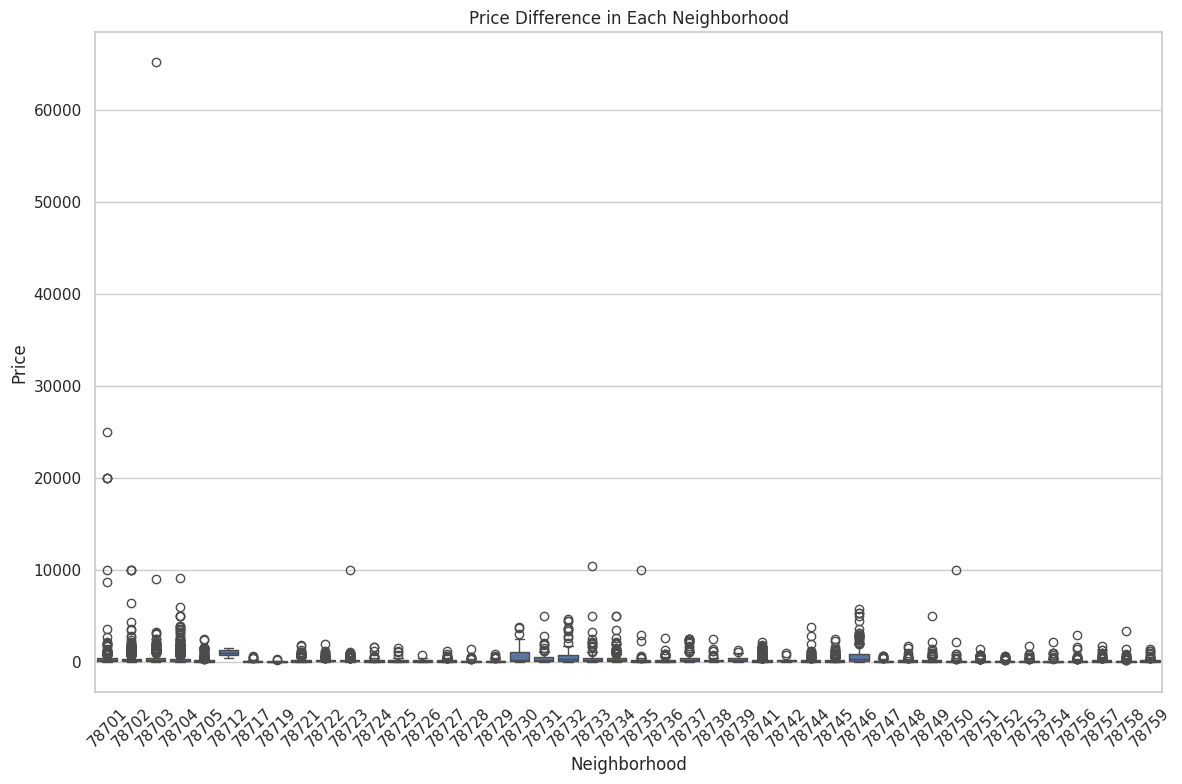

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Create the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood', y='price', data=listings)
plt.title('Price Difference in Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Avg Price for each neighborhood

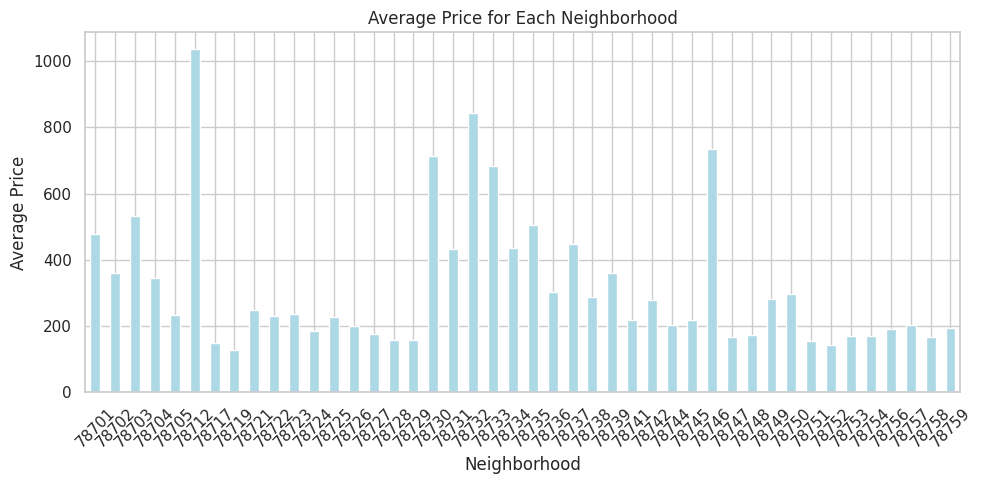

In [126]:
import matplotlib.pyplot as plt

# Calculate average price for each neighborhood
avg_price_neighborhood = listings.groupby('neighbourhood')['price'].mean()

# Plotting
plt.figure(figsize=(10, 5))
avg_price_neighborhood.plot(kind='bar', color='lightblue')
plt.title('Average Price for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Avg Price for each neighborhood FOR 0 REVIEW

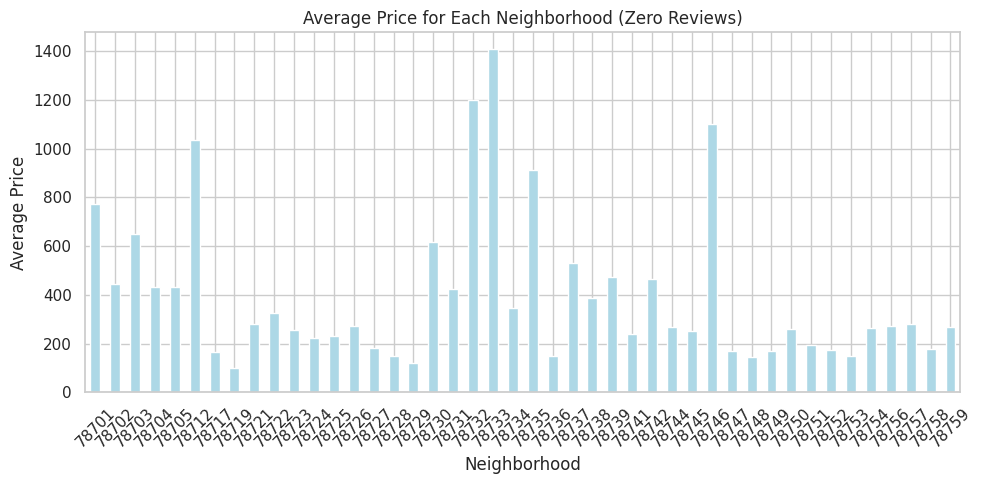

In [133]:
import matplotlib.pyplot as plt

# Filter rows where number of reviews is 0
zero_reviews = listings[listings['number_of_reviews'] == 0]

# Calculate average price for each neighborhood
avg_price_neighborhood_zero_reviews = zero_reviews.groupby('neighbourhood')['price'].mean()

# Plotting
plt.figure(figsize=(10, 5))
avg_price_neighborhood_zero_reviews.plot(kind='bar', color='lightblue')
plt.title('Average Price for Each Neighborhood (Zero Reviews)')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


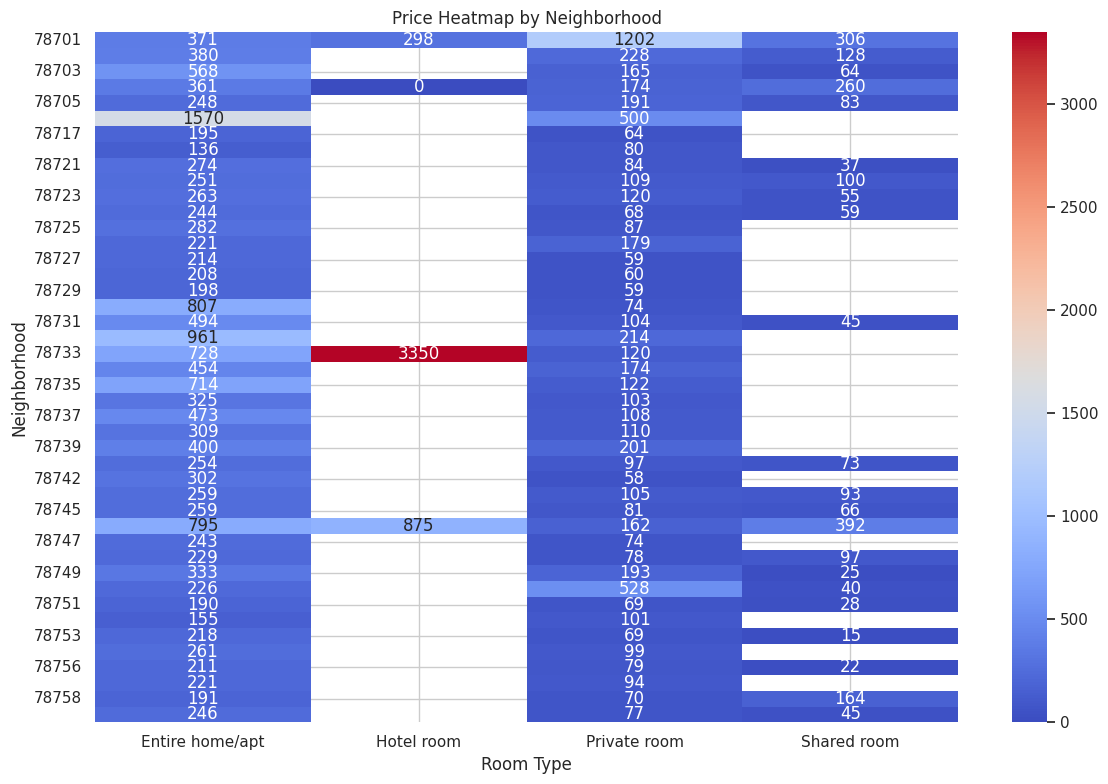

In [146]:
import seaborn as sns

# Creating Price Heatmap by Neighborhood
plt.figure(figsize=(12, 8))
heatmap_data = listings.pivot_table(index='neighbourhood', columns='room_type', values='price', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Price Heatmap by Neighborhood')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.tight_layout()
plt.show()


## # of review VS Reviews Per Month

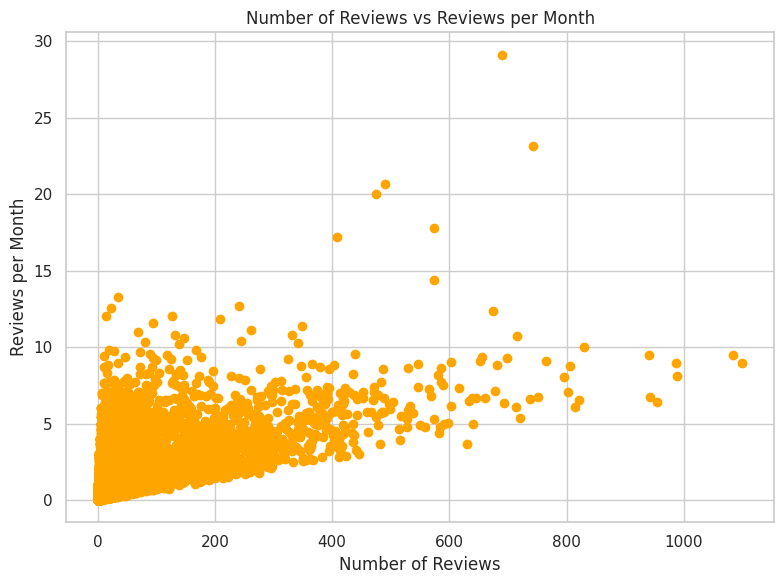

In [116]:
# Scatter plot Number of Reviews vs Reviews per Month
plt.figure(figsize=(8, 6))
plt.scatter(listings['number_of_reviews'], listings['reviews_per_month'], color='orange')
plt.title('Number of Reviews vs Reviews per Month')
plt.xlabel('Number of Reviews')
plt.ylabel('Reviews per Month')
plt.tight_layout()
plt.show()


## Price vs. Number of Reviews

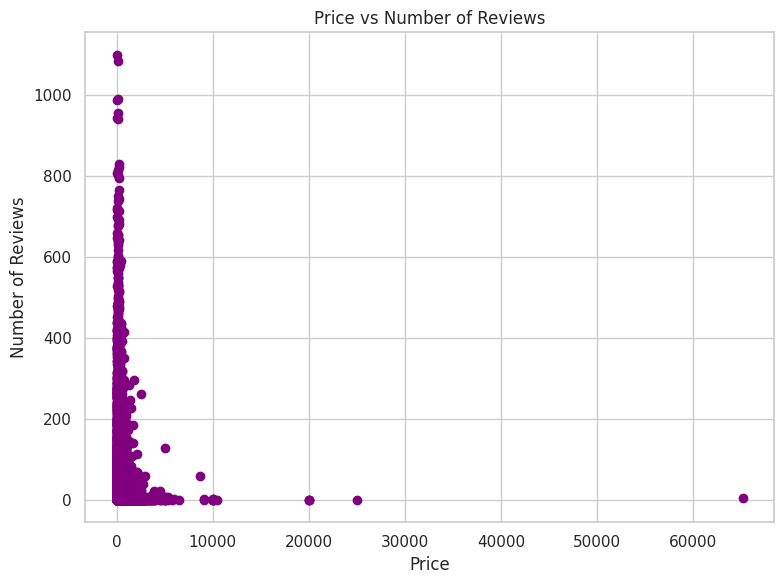

In [117]:
# Scatter plot Price vs Number of Reviews
plt.figure(figsize=(8, 6))
plt.scatter(listings['price'], listings['number_of_reviews'], color='purple')
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


### Number of Reviews FOR EACH NEIGHBOR

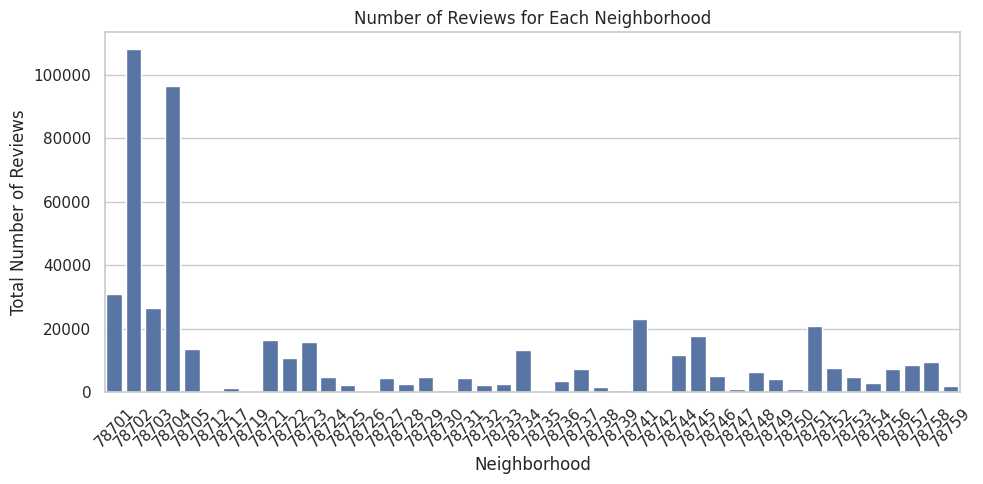

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the total number of reviews for each neighborhood
reviews_by_neighborhood = listings.groupby('neighbourhood')['number_of_reviews'].sum().sort_values()

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(x=reviews_by_neighborhood.index, y=reviews_by_neighborhood.values)
plt.title('Number of Reviews for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Zero Reviews for Neighborhood

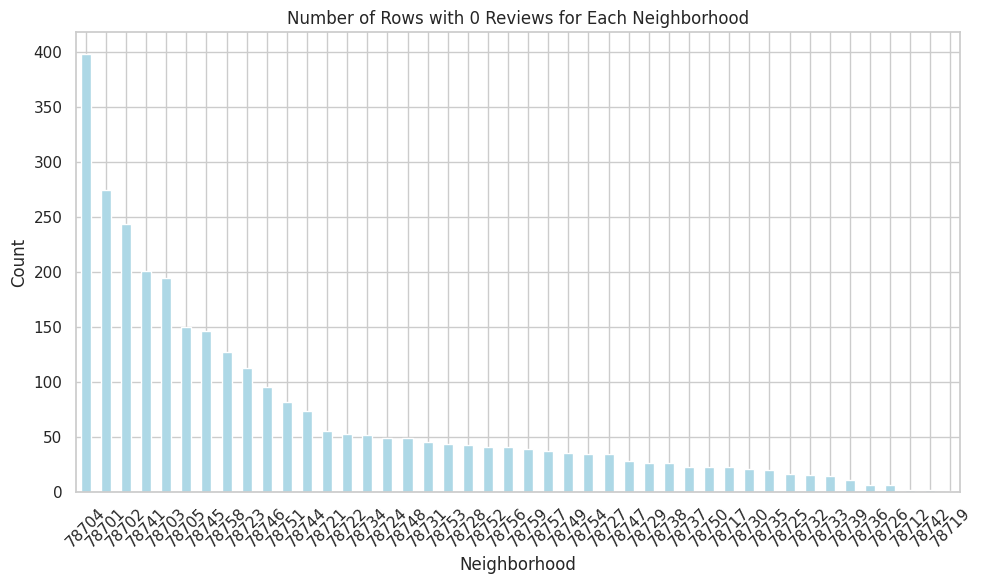

In [128]:
import matplotlib.pyplot as plt

# Filter rows where number of reviews is 0
zero_reviews = listings[listings['number_of_reviews'] == 0]

# Calculate the count of such rows for each neighborhood
zero_reviews_by_neighborhood = zero_reviews['neighbourhood'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
zero_reviews_by_neighborhood.plot(kind='bar', color='lightblue')
plt.title('Number of Rows with 0 Reviews for Each Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Zero Reviews Price

<ipython-input-132-085d64ff7699>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_reviews['price_bin'] = pd.cut(zero_reviews['price'], bins=price_bins)


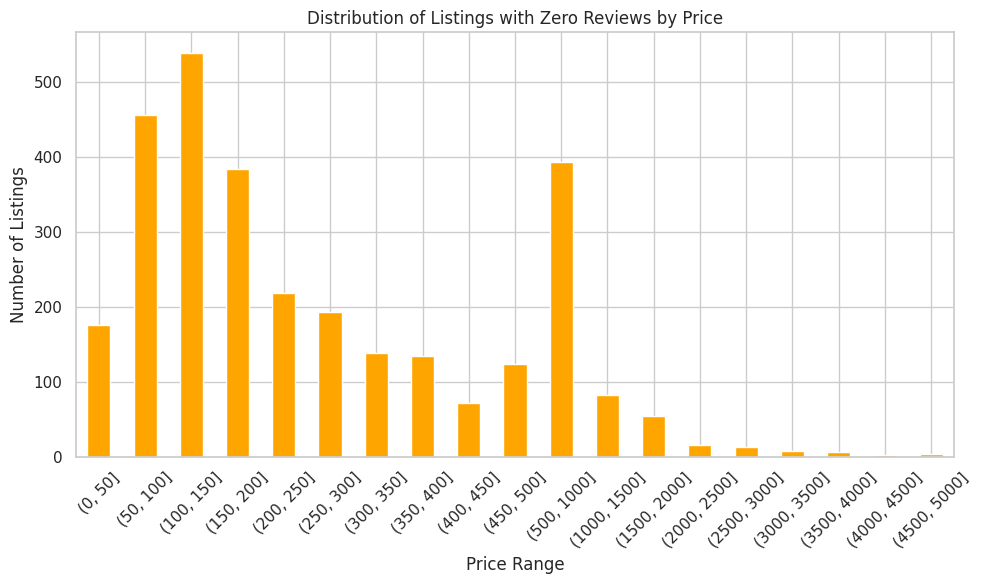

In [132]:
import matplotlib.pyplot as plt

# Define price ranges
price_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

# Cut prices into bins and count number of listings with zero reviews in each bin
zero_reviews['price_bin'] = pd.cut(zero_reviews['price'], bins=price_bins)
zero_reviews_by_price = zero_reviews['price_bin'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
zero_reviews_by_price.plot(kind='bar', color='orange')
plt.title('Distribution of Listings with Zero Reviews by Price')
plt.xlabel('Price Range')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Availability Dist

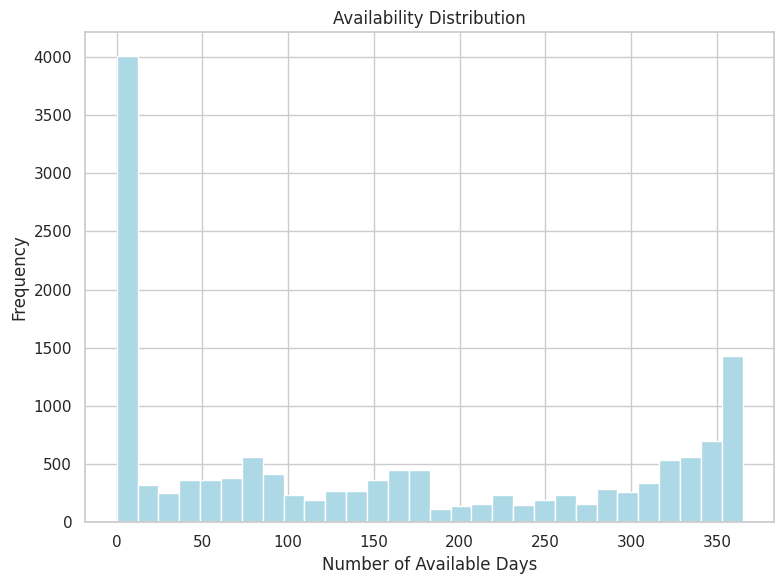

In [135]:
# Plotting Availability Distribution
plt.figure(figsize=(8, 6))
plt.hist(listings['availability_365'], bins=30, color='lightblue')
plt.title('Availability Distribution')
plt.xlabel('Number of Available Days')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## Host Listings Count Distribution:

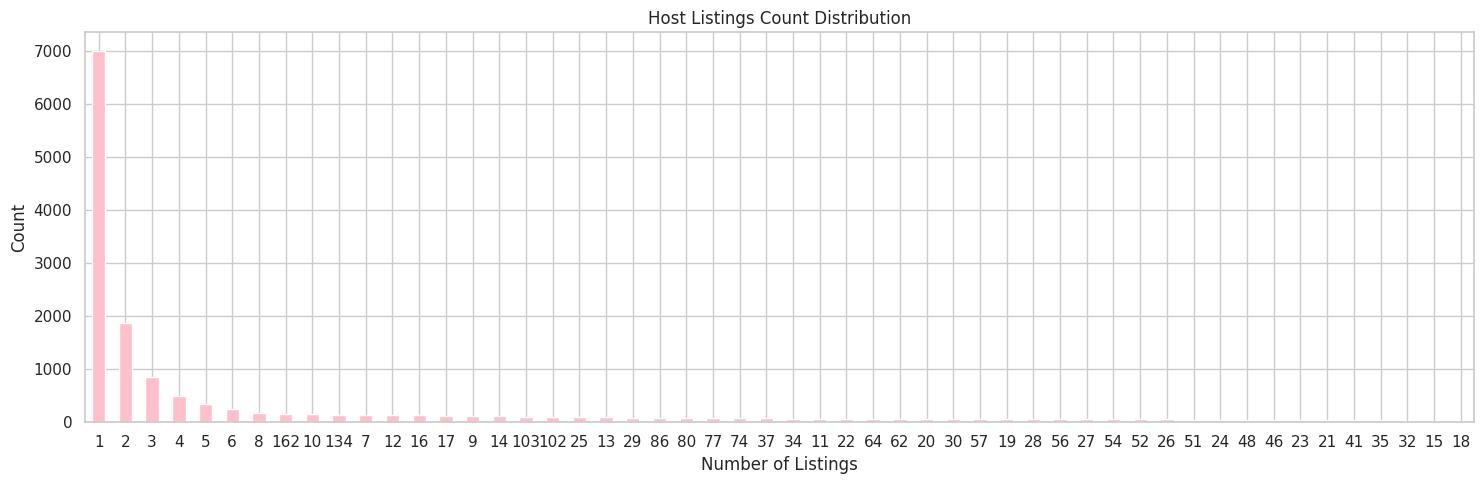

In [144]:
# Plotting Host Listings Count Distribution
plt.figure(figsize=(15, 5))
listings['calculated_host_listings_count'].value_counts().plot(kind='bar', color='pink')
plt.title('Host Listings Count Distribution')
plt.xlabel('Number of Listings')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Listings Detailed

In [149]:
listings_detailed

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.820,4.730,4.790,NaN,f,2,2,0,0,3.690
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.940,4.760,4.920,NaN,f,1,0,1,0,1.750
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.980,4.870,4.930,NaN,f,1,1,0,0,0.760
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.970,4.970,4.900,NaN,t,1,1,0,0,2.100
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.860,4.640,4.570,NaN,f,1,1,0,0,0.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,847159076072987428,https://www.airbnb.com/rooms/847159076072987428,20230316044216,2023-03-17,city scrape,Central Austin Bungalow!,"This is a 4 bedroom, 2 bathroom condo in the h...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14364,847171709264672413,https://www.airbnb.com/rooms/847171709264672413,20230316044216,2023-03-17,city scrape,Fresh Austin Studio Apartment!,Keep it simple at this peaceful and centrally-...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14365,847178203609366885,https://www.airbnb.com/rooms/847178203609366885,20230316044216,2023-03-16,city scrape,Quaint Austin Condo!,"In the heart of Central Austin, you can't go w...",NaN,https://a0.muscache.com/pictures/537356ed-2938...,276920863,...,NaN,NaN,NaN,NaN,t,41,41,0,0,NaN
14366,847256590826352221,https://www.airbnb.com/rooms/847256590826352221,20230316044216,2023-03-16,city scrape,NEW! Aqua Azul Outdoors - Near Lake Travis,"Escape to our charming home, just a stone's th...","About 20 miles northwest of downtown Dustin, H...",https://a0.muscache.com/pictures/prohost-api/H...,499116561,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN


In [151]:
simple_eda(listings_detailed)

Basic Structure:
Number of Rows: 14368
Number of Columns: 75

Missing Values by Column:
id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3031
Length: 75, dtype: int64 

Data Types:
id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
          

**note that numeric values for review rating is in this dataset**

## # of bedroom and price

In [182]:
listings_detailed['bedrooms']

0       1.000
1       1.000
2         NaN
3       1.000
4       1.000
         ... 
14363   4.000
14364     NaN
14365   2.000
14366   2.000
14367   1.000
Name: bedrooms, Length: 14368, dtype: float64

<ipython-input-173-9528ea58315f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis')


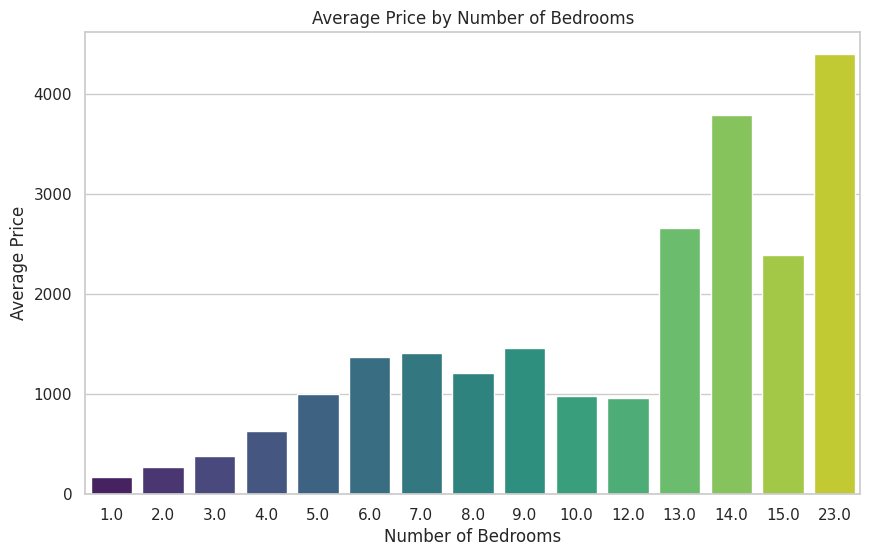

In [173]:
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by number of bedrooms and calculate average price
avg_price_by_bedrooms = listings_detailed.groupby('bedrooms')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=avg_price_by_bedrooms, palette='viridis')
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()


## # of Bathroom and Price

In [186]:
listings_detailed['bathrooms_text']

0               1 bath
1        1 shared bath
2               1 bath
3               1 bath
4               1 bath
             ...      
14363          2 baths
14364           1 bath
14365           1 bath
14366          2 baths
14367           1 bath
Name: bathrooms_text, Length: 14368, dtype: object

<ipython-input-188-e9039b8eb106>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='bathrooms_text', y='price', data=avg_price_by_bathrooms, palette='viridis')


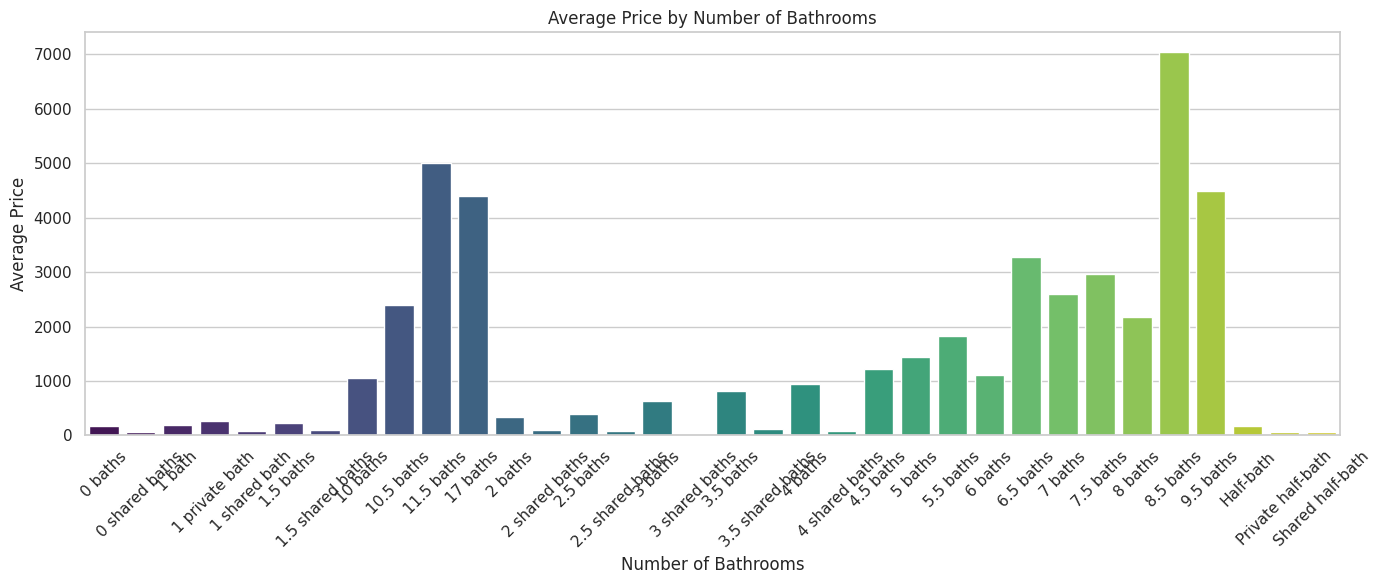

In [188]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_bathrooms = listings_detailed.groupby('bathrooms_text')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x='bathrooms_text', y='price', data=avg_price_by_bathrooms, palette='viridis')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [190]:
avg_price_by_bathrooms

,bathrooms_text,price
0,0 baths,177.708
1,0 shared baths,59.721
2,1 bath,197.427
3,1 private bath,266.271
4,1 shared bath,83.128
5,1.5 baths,225.341
6,1.5 shared baths,94.141
7,10 baths,1051.000
8,10.5 baths,2398.000
9,11.5 baths,4999.000


## # of people allowed VS Price

In [191]:
listings_detailed['accommodates']

0         3
1         2
2         2
3         2
4         2
         ..
14363    10
14364     2
14365     5
14366     6
14367     5
Name: accommodates, Length: 14368, dtype: int64

<ipython-input-192-573db836fba9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')


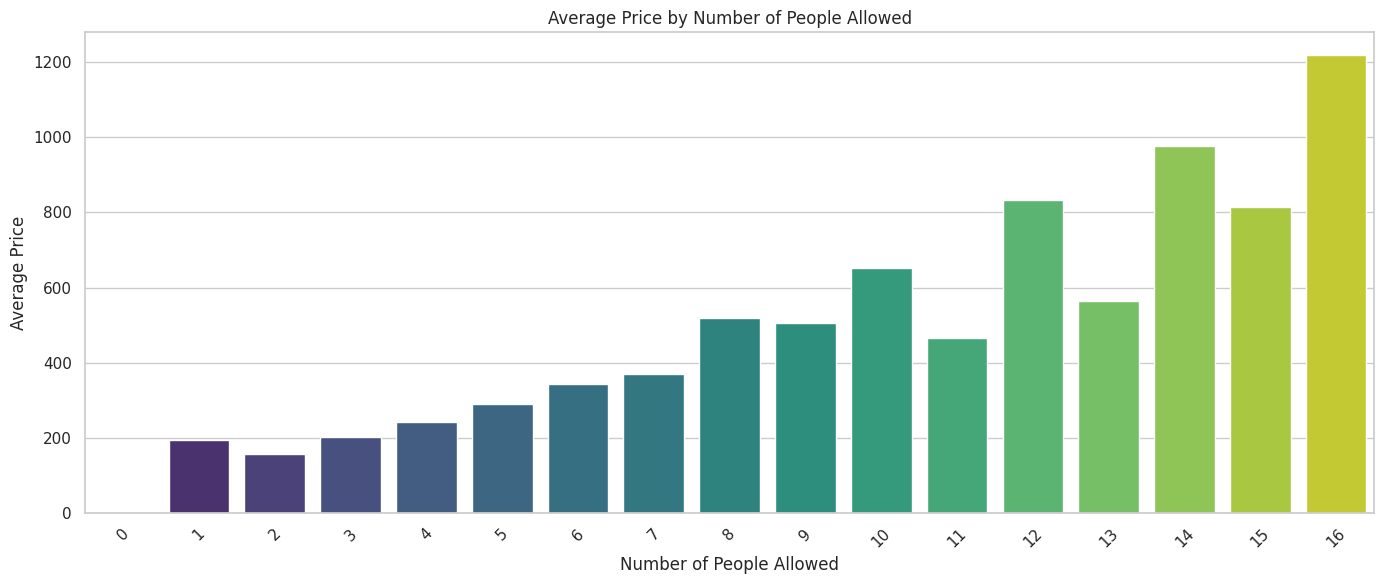

In [192]:
import seaborn as sns

# Replace '$' and ',' in 'price' column and convert to float
listings_detailed['price'] = listings_detailed['price'].replace('[\$,]', '', regex=True).astype(float)

# Group data by 'bathrooms_text' and calculate average price
avg_price_by_ppl = listings_detailed.groupby('accommodates')['price'].mean().reset_index()

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(x='accommodates', y='price', data=avg_price_by_ppl, palette='viridis')
plt.title('Average Price by Number of People Allowed')
plt.xlabel('Number of People Allowed')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Amenities

In [193]:
listings_detailed['amenities']

0        ["Heating", "Backyard", "Bed linens", "Hot wat...
1        ["Private backyard", "Free parking on premises...
2        ["Heating", "Outdoor dining area", "Dove body ...
3        ["Pack \u2019n play/Travel crib", "Free parkin...
4        ["Essentials", "Heating", "Central air conditi...
                               ...                        
14363    ["Washer", "Fire extinguisher", "Free parking ...
14364    ["Heating", "Bed linens", "Dishwasher", "Hot w...
14365    ["Free parking on premises", "Heating", "Bed l...
14366    ["Free parking on premises", "Heating", "Bed l...
14367    ["Free parking on premises", "Heating", "Backy...
Name: amenities, Length: 14368, dtype: object

## Top 20 Amenities

<ipython-input-197-3f1d48e7943b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


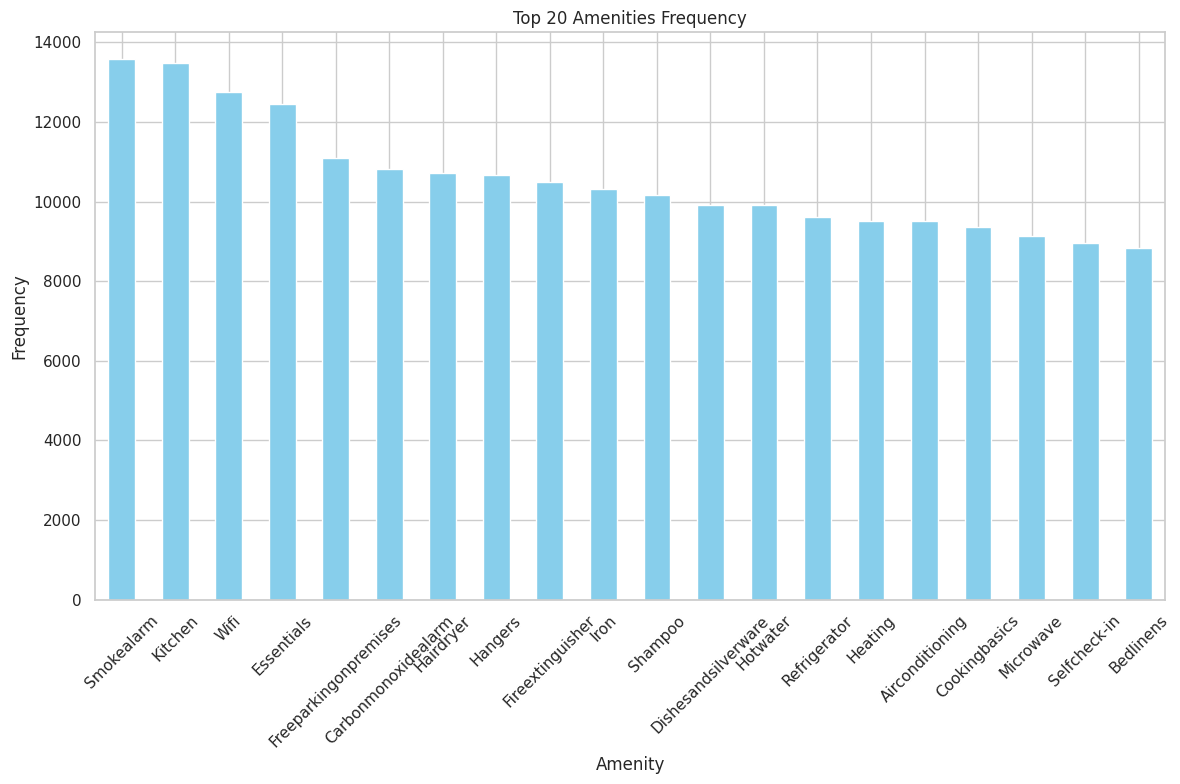

In [197]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Flatten the list of amenities
amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')

# Count the occurrences of each amenity
amenities_counts = pd.Series([amenity for sublist in amenities_list for amenity in sublist]).value_counts()

# Select the top 10 most common amenities
top_10_amenities = amenities_counts.head(20)

# Plotting
plt.figure(figsize=(12, 8))
top_10_amenities.plot(kind='bar', color='skyblue')
plt.title('Top 20 Amenities Frequency')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [195]:
amenities_list

0        [Heating, Backyard, Bedlinens, Hotwater, Shamp...
1        [Privatebackyard, Freeparkingonpremises, Outdo...
2        [Heating, Outdoordiningarea, Dovebodysoap, Bed...
3        [Pack\u2019nplay/Travelcrib, Freeparkingonprem...
4        [Essentials, Heating, Centralairconditioning, ...
                               ...                        
14363    [Washer, Fireextinguisher, Freeparkingonpremis...
14364    [Heating, Bedlinens, Dishwasher, Hotwater, Bod...
14365    [Freeparkingonpremises, Heating, Bedlinens, Di...
14366    [Freeparkingonpremises, Heating, Bedlinens, Di...
14367    [Freeparkingonpremises, Heating, Backyard, Bed...
Name: amenities, Length: 14368, dtype: object

## Top 20 Amenities Of Bottom

<ipython-input-202-343444f9aef8>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')


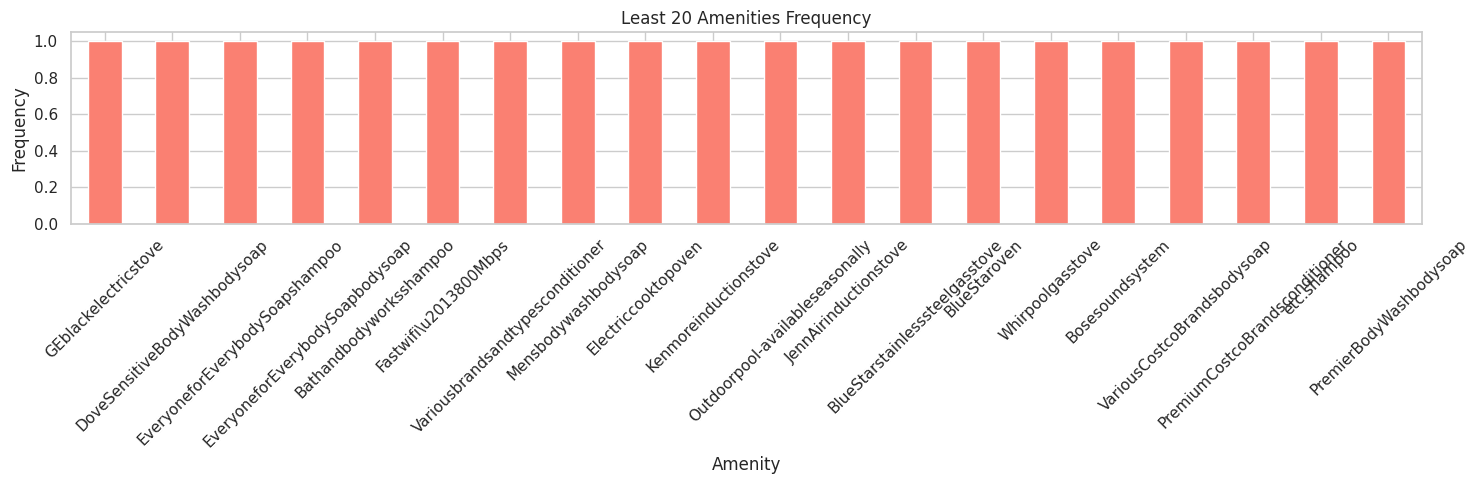

In [202]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Flatten the list of amenities
amenities_list = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',')

# Count the occurrences of each amenity
amenities_counts = pd.Series([amenity for sublist in amenities_list for amenity in sublist]).value_counts()

# Select the least 20 common amenities
least_20_amenities = amenities_counts.tail(20)

# Plotting
plt.figure(figsize=(15, 5))
least_20_amenities.plot(kind='bar', color='salmon')
plt.title('Least 20 Amenities Frequency')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Frequency of # of Amenities

<ipython-input-215-93ccc5f74991>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)


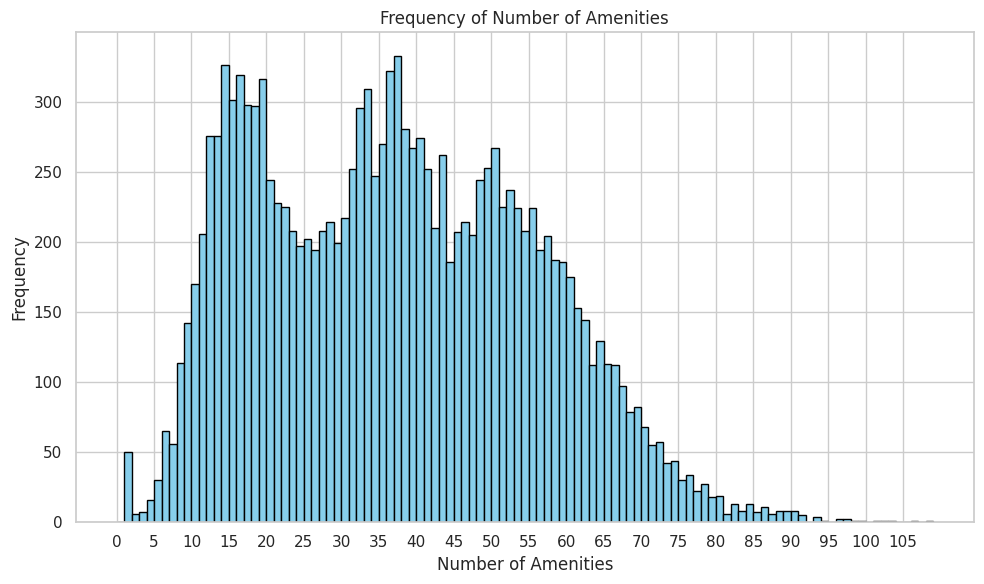

In [215]:
import matplotlib.pyplot as plt
# Count the number of amenities for each listing
listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(listings_detailed['num_amenities'], bins=range(0, max(listings_detailed['num_amenities']) + 1), color='skyblue', edgecolor='black')
plt.title('Frequency of Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Frequency')
plt.xticks(range(0, max(listings_detailed['num_amenities']) + 1, 5))
plt.tight_layout()
plt.show()


## # of Amenities and Price

<ipython-input-212-9689171a077b>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)


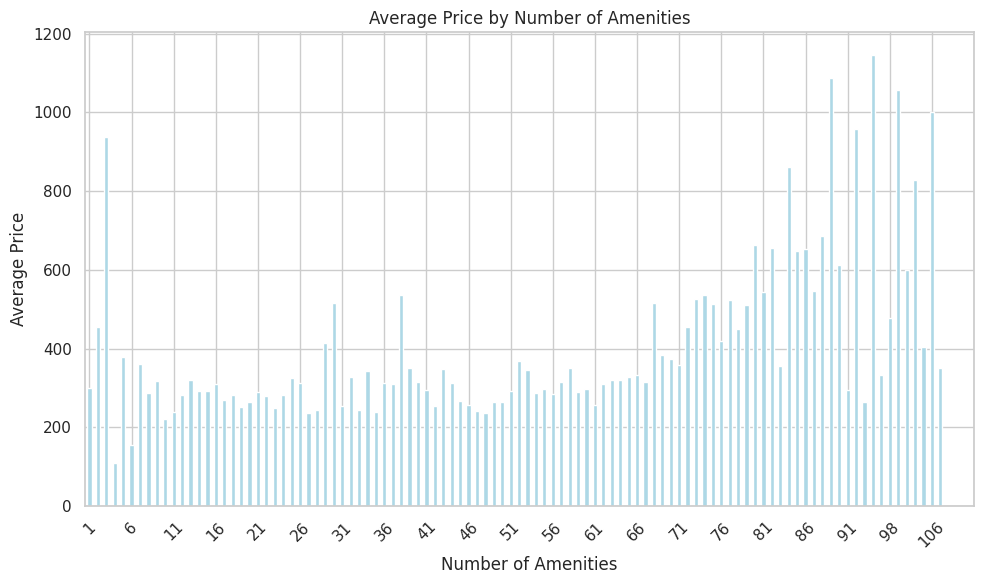

In [212]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming listings_detailed['amenities'] contains the list of amenities for each listing

# Count the number of amenities for each listing
listings_detailed['num_amenities'] = listings_detailed['amenities'].str.replace('[\[\]\"\'\s]', '').str.split(',').apply(len)

# Group the data by the number of amenities and calculate the average price
avg_price_by_amenities = listings_detailed.groupby('num_amenities')['price'].mean()

# Plotting
plt.figure(figsize=(10, 6))
avg_price_by_amenities.plot(kind='bar', color='lightblue')
plt.title('Average Price by Number of Amenities')
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.xticks(range(0, max(avg_price_by_amenities.index) + 1, 5))  # Adjust x-axis ticks
plt.tight_layout()
plt.show()


## Review

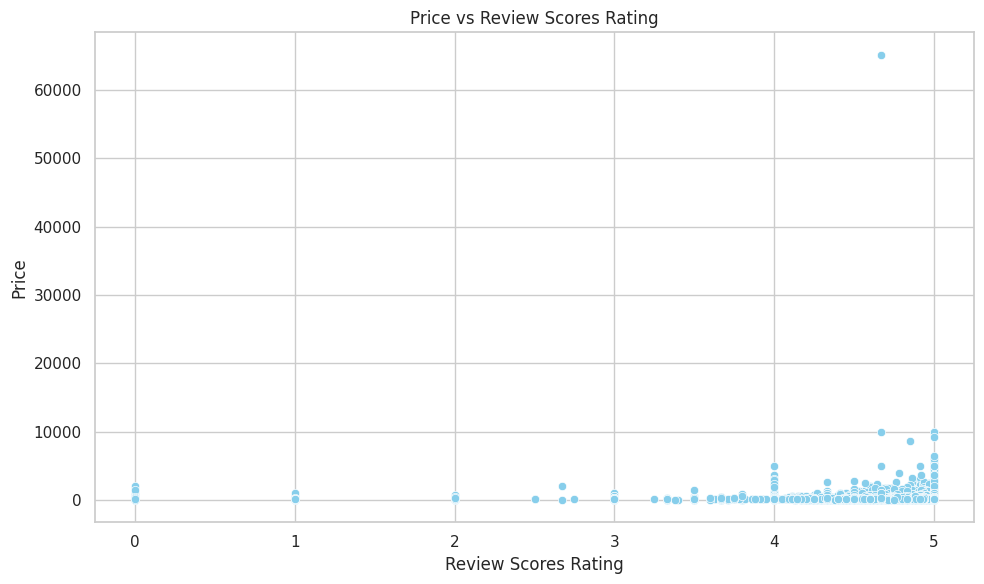

In [216]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='review_scores_rating', y='price', data=listings_detailed, color='skyblue')
plt.title('Price vs Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

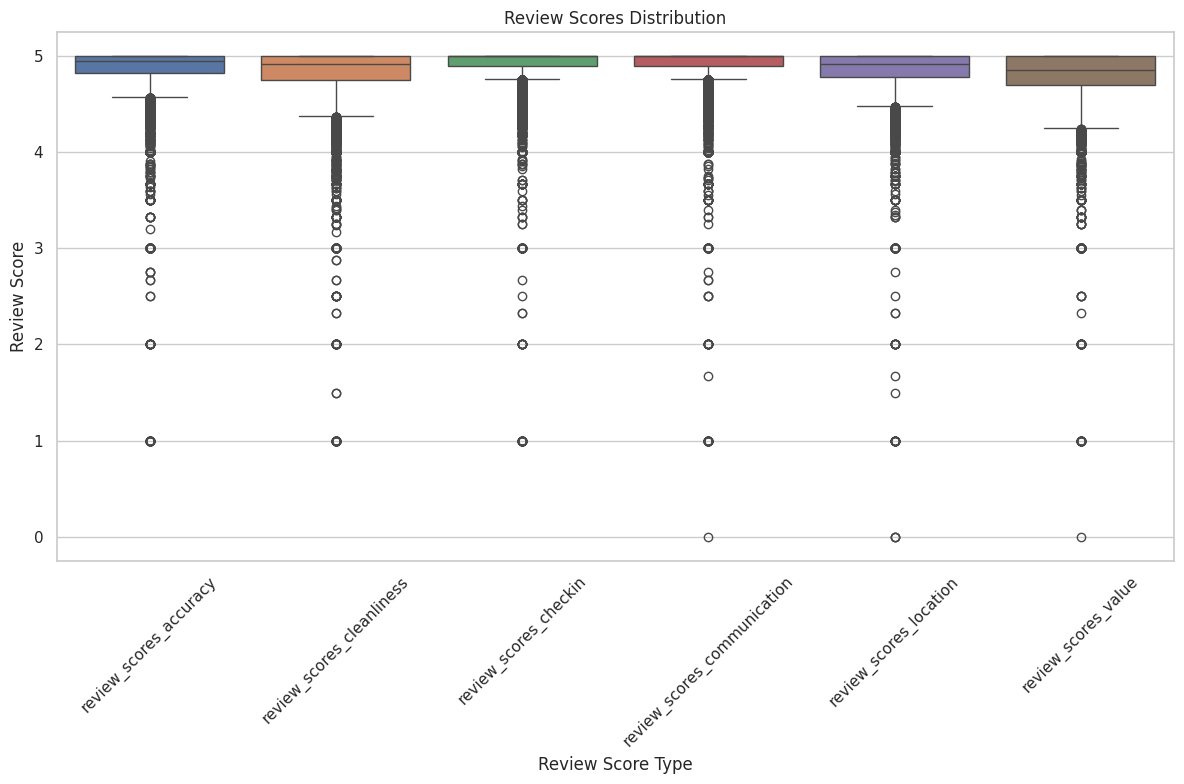

In [217]:
review_scores_columns = ['review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                         'review_scores_communication', 'review_scores_location', 'review_scores_value']

plt.figure(figsize=(12, 8))
sns.boxplot(data=listings_detailed[review_scores_columns])
plt.title('Review Scores Distribution')
plt.ylabel('Review Score')
plt.xlabel('Review Score Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


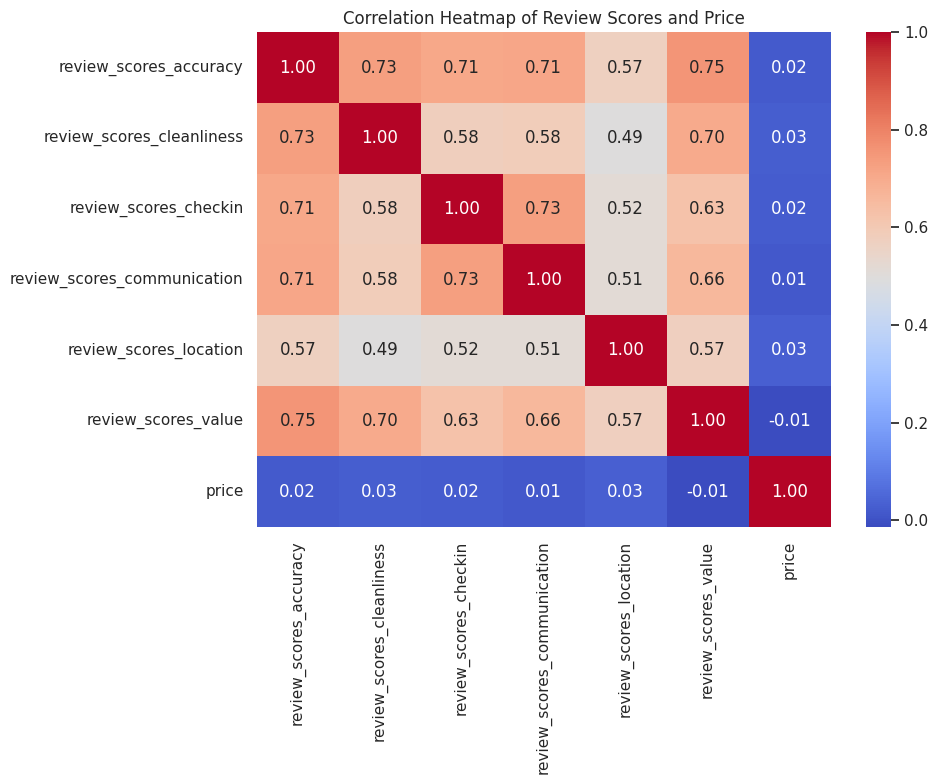

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns for the heatmap
heatmap_data = listings_detailed[review_scores_columns + ['price']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Review Scores and Price')
plt.tight_layout()
plt.show()


## How many listings for each host

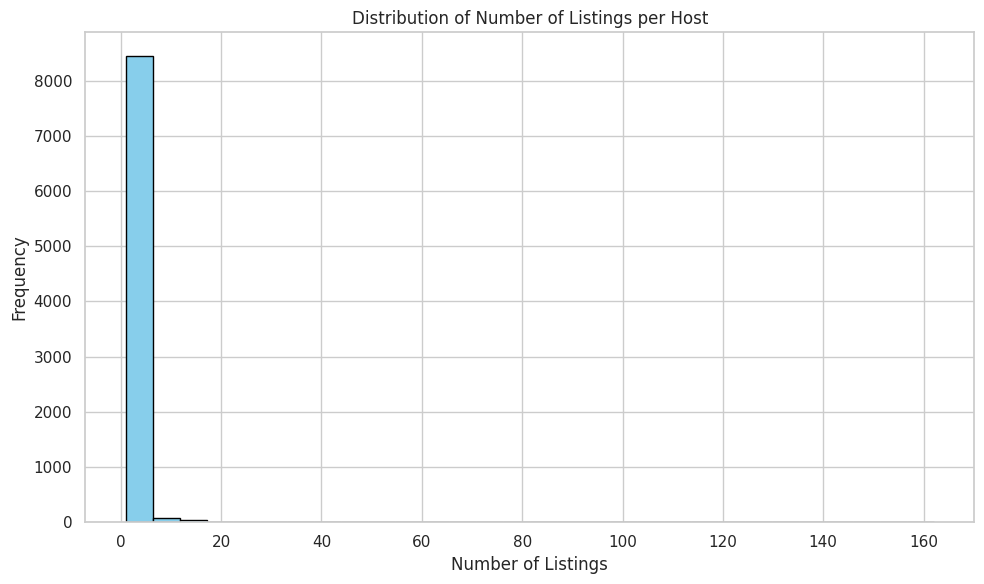

In [221]:
import matplotlib.pyplot as plt

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(host_listings_count, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings per Host')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


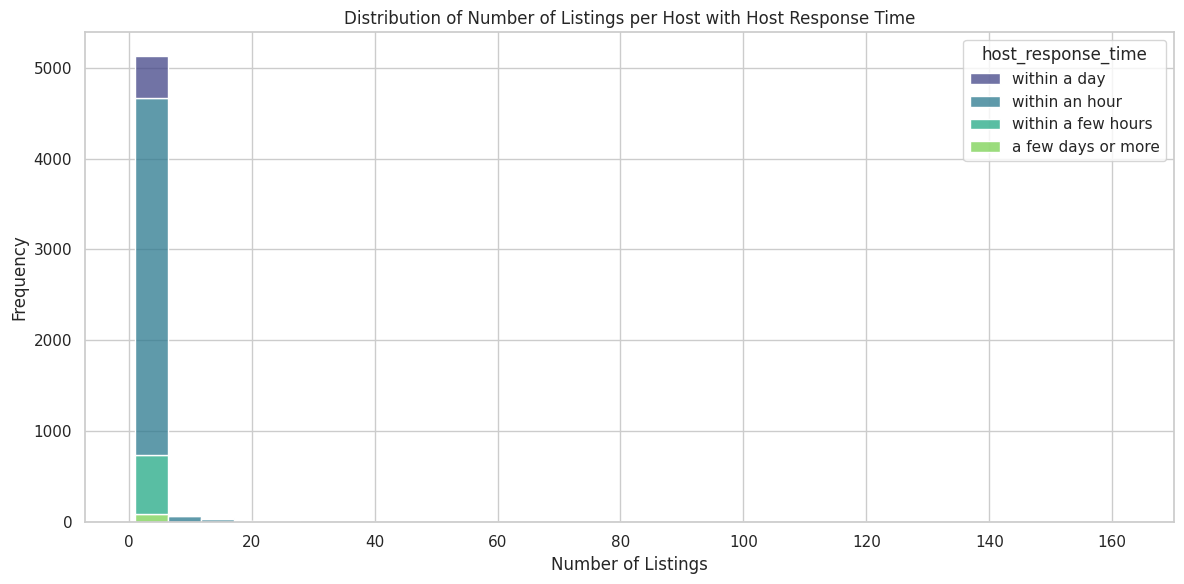

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group data by host_id and count the number of listings for each host
host_listings_count = listings_detailed.groupby('host_id')['id'].count().reset_index()

# Merge with the host_response_time information
host_response_time = listings_detailed[['host_id', 'host_response_time']].drop_duplicates()

# Merge the data
host_data = host_listings_count.merge(host_response_time, on='host_id', how='left')

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data, x='id', hue='host_response_time', bins=30, multiple='stack', palette='viridis')
plt.title('Distribution of Number of Listings per Host with Host Response Time')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


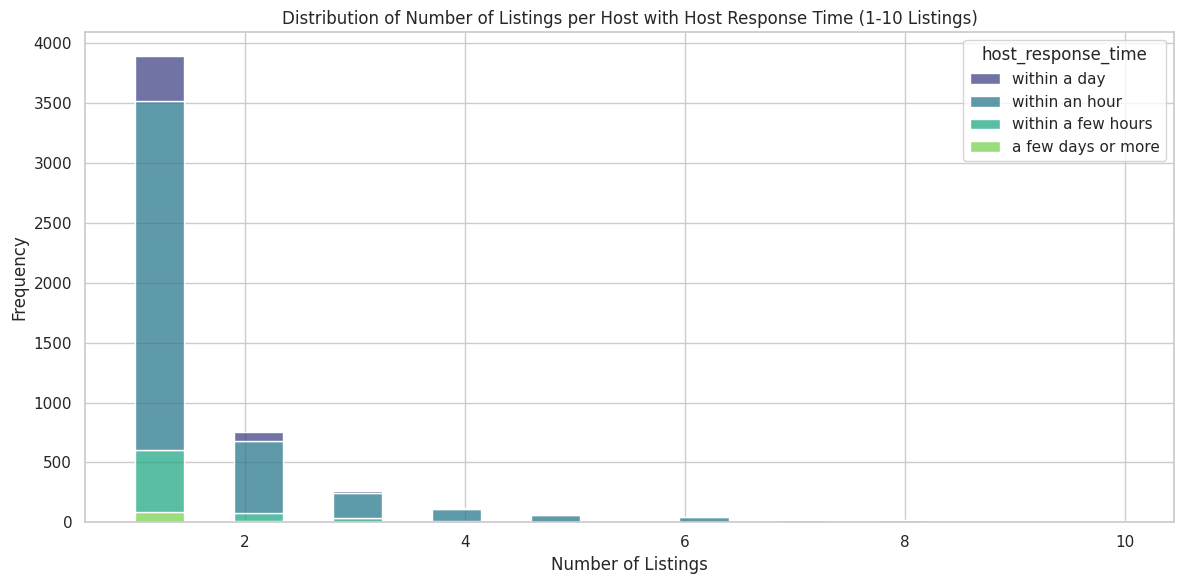

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter host_data to include only hosts with 1 to 20 listings
host_data_filtered = host_data[(host_data['id'] >= 1) & (host_data['id'] <= 10)]

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data_filtered, x='id', hue='host_response_time', bins=20, multiple='stack', palette='viridis')
plt.title('Distribution of Number of Listings per Host with Host Response Time (1-10 Listings)')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


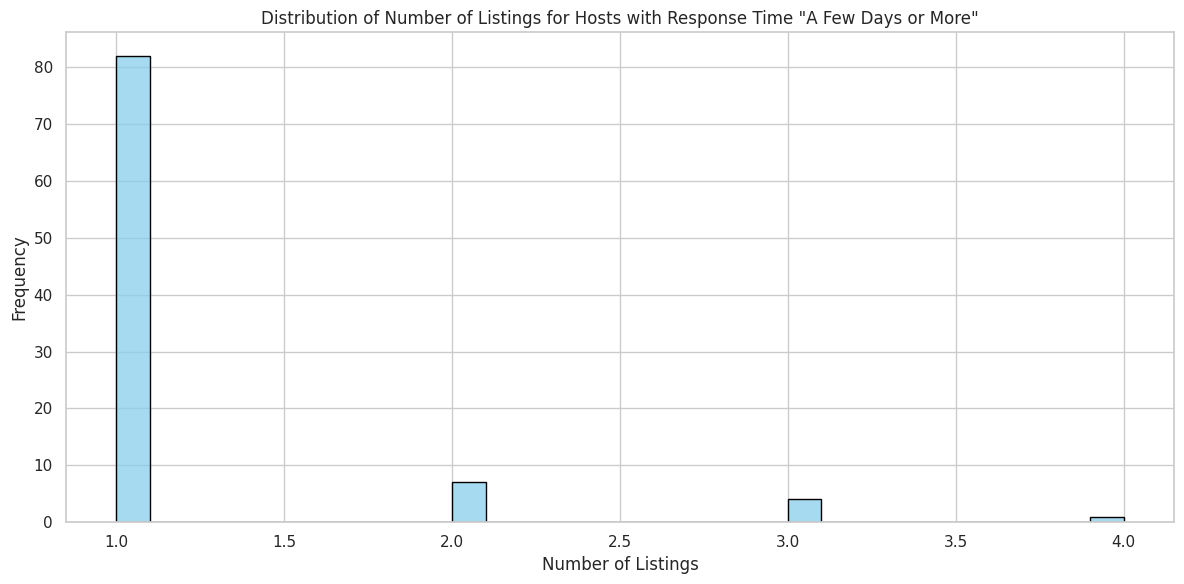

In [264]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter host_data for hosts with response time 'a few days or more'
host_data_filtered = host_data[host_data['host_response_time'] == 'a few days or more']

# Plotting
plt.figure(figsize=(12, 6))
sns.histplot(data=host_data_filtered, x='id', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Listings for Hosts with Response Time "A Few Days or More"')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


In [222]:
host_listings_count

host_id
23           3
796          1
2466         1
5146         1
8028         2
            ..
504535441    1
504557324    9
504764759    1
505094563    1
505184803    1
Name: id, Length: 8625, dtype: int64

In [223]:
max(host_listings_count)

162

## Host with 162 Property

In [226]:
# Filter the host_listings_count Series for the count of 162
host_id_with_162_count = host_listings_count[host_listings_count == 162]

# Display the host_id
print(host_id_with_162_count)


host_id
263502162    162
Name: id, dtype: int64


In [228]:
many_listings_host = listings_detailed[listings_detailed['host_id'] == 263502162]
many_listings_host

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,num_amenities
6621,47398666,https://www.airbnb.com/rooms/47398666,20230316044216,2023-03-16,city scrape,Modern Apartment in Prime Location (ID1747),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,20
6626,47432776,https://www.airbnb.com/rooms/47432776,20230316044216,2023-03-16,previous scrape,Modern Apartment in Prime Location (ID6361),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,19
6689,47852046,https://www.airbnb.com/rooms/47852046,20230316044216,2023-03-16,previous scrape,Landing | Modern Apartment with Amazing Amenit...,This Landing listing is only available for mon...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,19
6700,47900053,https://www.airbnb.com/rooms/47900053,20230316044216,2023-03-16,previous scrape,Modern Apartment in Prime Location (ID5843),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,20
6727,47986276,https://www.airbnb.com/rooms/47986276,20230316044216,2023-03-16,city scrape,Modern Apartment in Prime Location (ID913),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12646,767001326946264568,https://www.airbnb.com/rooms/767001326946264568,20230316044216,2023-03-16,city scrape,Modern Apartment in Prime Location (ID3240X23),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,19
12647,767001331051817329,https://www.airbnb.com/rooms/767001331051817329,20230316044216,2023-03-17,previous scrape,Modern Apartment in Prime Location (ID7518),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,17
12648,767001344733921457,https://www.airbnb.com/rooms/767001344733921457,20230316044216,2023-03-17,previous scrape,Modern Apartment in Prime Location (ID3240X23),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,19
12724,772794492028587007,https://www.airbnb.com/rooms/772794492028587007,20230316044216,2023-03-16,city scrape,Modern Apartment in Prime Location (ID3752X32),From the open floor plan to high-end appliance...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,263502162,...,NaN,NaN,NaN,t,162,162,0,0,NaN,20


In [232]:
# 1. Summary Statistics
price_stats = many_listings_host['price'].describe()

price_stats

count   162.000
mean    123.654
std      65.245
min      57.000
25%      94.250
50%     110.500
75%     137.750
max     720.000
Name: price, dtype: float64

In [233]:
num_room_stats = many_listings_host['bedrooms'].describe()
num_room_stats

count   155.000
mean      1.465
std       0.584
min       1.000
25%       1.000
50%       1.000
75%       2.000
max       3.000
Name: bedrooms, dtype: float64

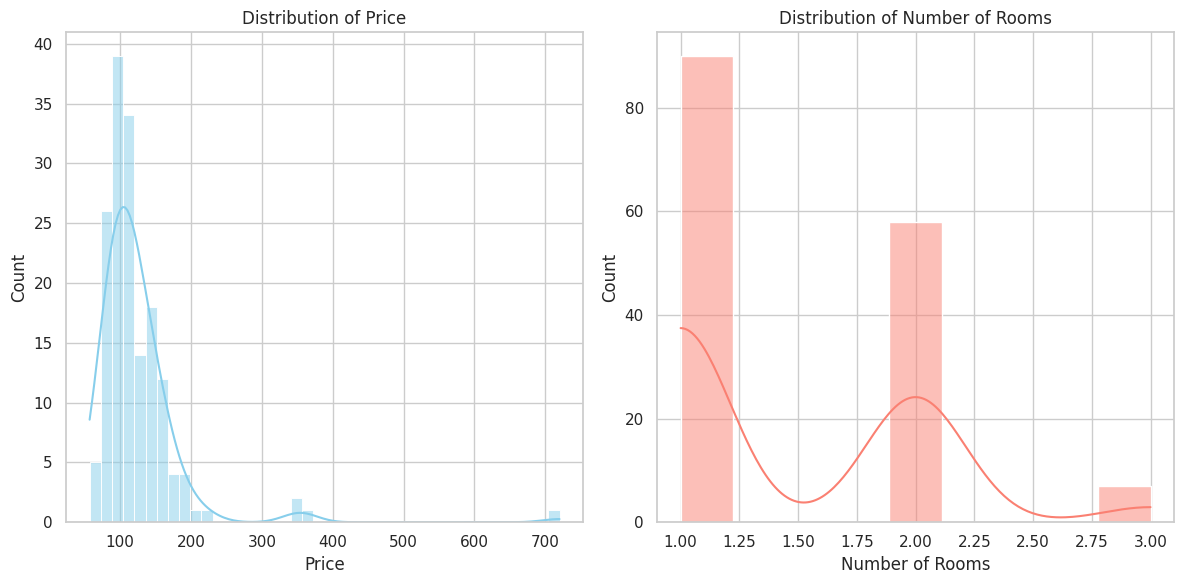

In [235]:
# 2. Distribution Plots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(many_listings_host['price'], kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')

plt.subplot(1, 2, 2)
sns.histplot(many_listings_host['bedrooms'], kde=True, color='salmon')
plt.title('Distribution of Number of Rooms')
plt.xlabel('Number of Rooms')

plt.tight_layout()
plt.show()

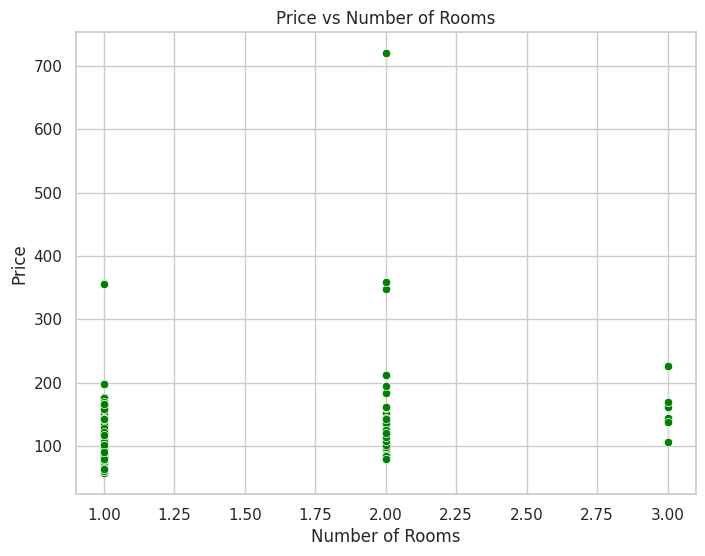

In [237]:
# 3. Relationship Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=many_listings_host, color='green')
plt.title('Price vs Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

In [253]:
many_listings_host.columns


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [257]:
many_listings_host['neighbourhood_cleansed']

6621     78747
6626     78749
6689     78738
6700     78701
6727     78747
         ...  
12646    78741
12647    78756
12648    78741
12724    78732
13112    78728
Name: neighbourhood_cleansed, Length: 162, dtype: int64

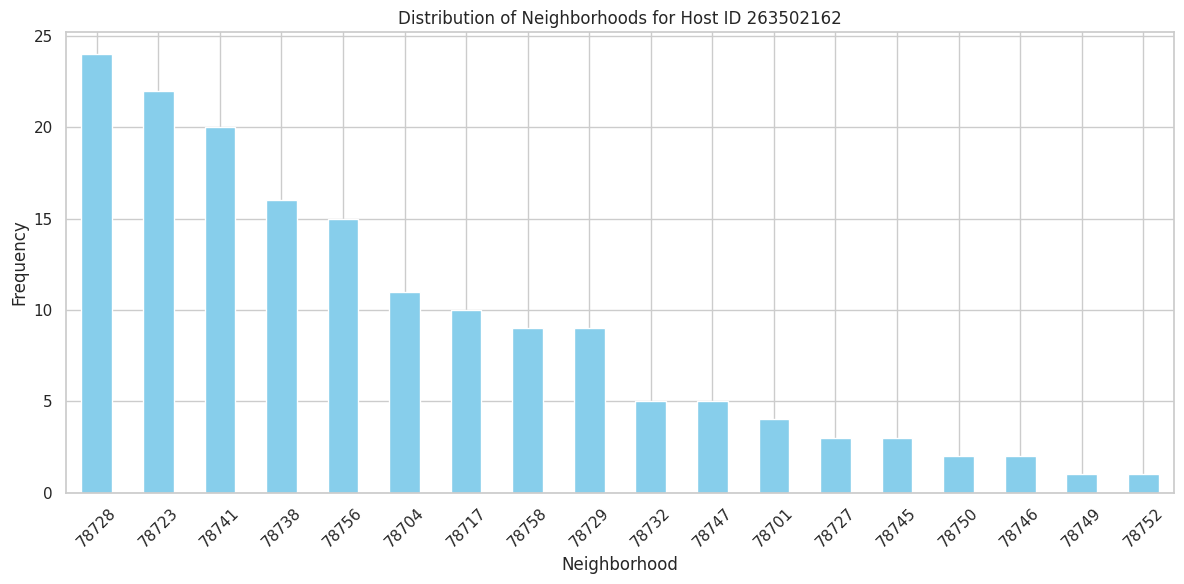

In [258]:
import matplotlib.pyplot as plt

# Count the occurrences of each neighborhood
neighborhood_counts = many_listings_host['neighbourhood_cleansed'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
neighborhood_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Neighborhoods for Host ID 263502162')
plt.xlabel('Neighborhood')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


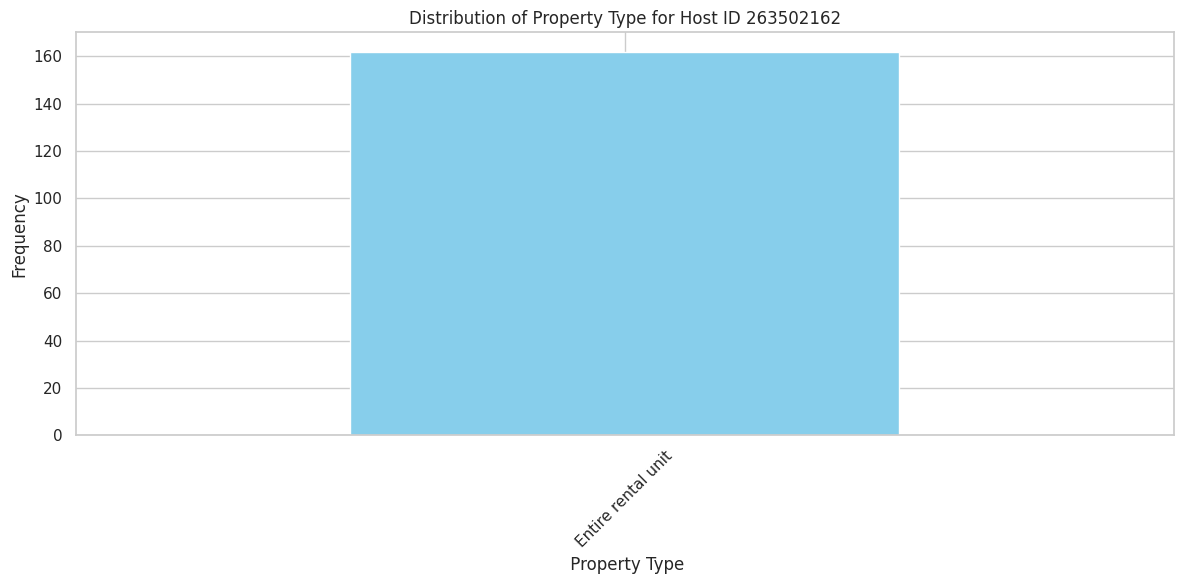

In [259]:
import matplotlib.pyplot as plt

# Count the occurrences of each property_type
property_type_counts = many_listings_host['property_type'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
property_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Property Type for Host ID 263502162')
plt.xlabel(' Property Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


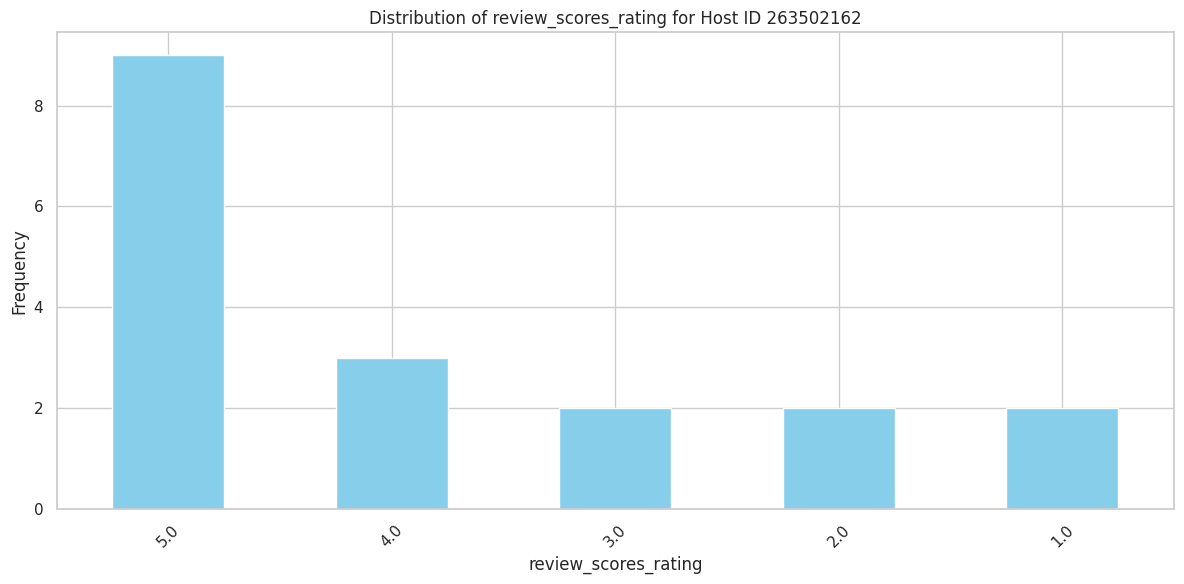

In [260]:
import matplotlib.pyplot as plt

# Count the occurrences of each review_scores_rating
review_scores_rating_counts = many_listings_host['review_scores_rating'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))
review_scores_rating_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of review_scores_rating for Host ID 263502162')
plt.xlabel('review_scores_rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Neighbourhood

In [153]:
neighbor = pd.read_csv('neighbourhoods.csv')
neighbor_json = pd.read_json('neighbourhoods.geojson')

In [154]:
neighbor

,neighbourhood_group,neighbourhood
0,NaN,78701
1,NaN,78702
2,NaN,78703
3,NaN,78704
4,NaN,78705
5,NaN,78712
6,NaN,78717
7,NaN,78719
8,NaN,78721
9,NaN,78722


In [155]:
simple_eda(neighbor)

Basic Structure:
Number of Rows: 44
Number of Columns: 2

Missing Values by Column:
neighbourhood_group    44
neighbourhood           0
dtype: int64 

Data Types:
neighbourhood_group    float64
neighbourhood            int64
dtype: object 

Unique Values by Column:
neighbourhood_group: 0
neighbourhood: 44


Summary Statistics for Numerical Columns:
       neighbourhood_group  neighbourhood
count                0.000         44.000
mean                   NaN      78733.750
std                    NaN         16.422
min                    NaN      78701.000
25%                    NaN      78723.750
50%                    NaN      78734.500
75%                    NaN      78747.250
max                    NaN      78759.000 

No categorical columns found.


In [156]:
neighbor_json

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
5,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
6,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
7,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
8,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
9,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [161]:
# Selecting one item
selected_item = neighbor_json['features'][0]  # Selecting the first item
print(selected_item)

{'type': 'Feature', 'geometry': {'type': 'MultiPolygon', 'coordinates': [[[[-97.890016, 30.209412], [-97.889286, 30.208708], [-97.888672, 30.207904], [-97.88822, 30.207299], [-97.88752, 30.206345], [-97.886872, 30.205469], [-97.886517, 30.205022], [-97.886029, 30.204487], [-97.88542, 30.203912], [-97.884924, 30.203498], [-97.884474, 30.203157], [-97.884007, 30.202848], [-97.883473, 30.202527], [-97.88299, 30.202254], [-97.882506, 30.202013], [-97.881903, 30.201707], [-97.881386, 30.201494], [-97.880723, 30.201256], [-97.879919, 30.200993], [-97.879385, 30.200851], [-97.878781, 30.200713], [-97.878058, 30.200553], [-97.877606, 30.200478], [-97.876957, 30.200411], [-97.876312, 30.200365], [-97.87568, 30.200342], [-97.875091, 30.200326], [-97.874472, 30.200349], [-97.873762, 30.200394], [-97.873041, 30.200473], [-97.872354, 30.200575], [-97.871806, 30.200691], [-97.871298, 30.200814], [-97.870575, 30.200965], [-97.870402, 30.201], [-97.870068, 30.201057], [-97.869675, 30.20111], [-97.8692

# Reviews

In [166]:
review

,listing_id,date
0,5456,2009-03-08
1,5456,2009-03-19
2,5456,2009-03-22
3,5456,2009-04-08
4,5456,2009-04-13
...,...,...
512936,842941255847701981,2023-03-12
512937,843417270276618386,2023-03-12
512938,843622671951831924,2023-03-12
512939,843655349786359396,2023-03-12


In [167]:
simple_eda(review)

Basic Structure:
Number of Rows: 512941
Number of Columns: 2

Missing Values by Column:
listing_id    0
date          0
dtype: int64 

Data Types:
listing_id     int64
date          object
dtype: object 

Unique Values by Column:
listing_id: 11337
date: 4347


Summary Statistics for Numerical Columns:
                  listing_id
count             512941.000
mean   59656201483386432.000
std   189465408093477536.000
min                 5456.000
25%              8780307.000
50%             23128066.000
75%             44334716.000
max   844120382867044480.000 

Categorical Columns Details:
Column 'date' unique values:
['2009-03-08' '2009-03-19' '2009-03-22' ... '2023-03-23' '2023-03-24'
 '2023-03-20']


# Review Detailed

In [168]:
review_detailed

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."
...,...,...,...,...,...,...
512936,842941255847701981,845661410697402325,2023-03-12,14899691,John,"Awesome house for our trip! Very easy to find,..."
512937,843417270276618386,845723642923820490,2023-03-12,197989084,Riley,Audrey is an excellent host. She’s very respon...
512938,843622671951831924,845681297581224320,2023-03-12,504829270,Rachel,This bnb delivers everything an Airstream offe...
512939,843655349786359396,845751232337119846,2023-03-12,28218577,Travis,"What a hidden gem of a place, near town enough..."


In [170]:
simple_eda(review_detailed)

Basic Structure:
Number of Rows: 512941
Number of Columns: 6

Missing Values by Column:
listing_id         0
id                 0
date               0
reviewer_id        0
reviewer_name      0
comments         120
dtype: int64 

Data Types:
listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object 

Unique Values by Column:
listing_id: 11337
id: 512941
date: 4347
reviewer_id: 439828
reviewer_name: 45254
comments: 493190


Summary Statistics for Numerical Columns:
                  listing_id                     id   reviewer_id
count             512941.000             512941.000    512941.000
mean   59656201483386432.000 288012139094502464.000 137856190.042
std   189465408093477536.000 328237531049840832.000 131666161.794
min                 5456.000                865.000        14.000
25%              8780307.000          360774049.000  30938200.000
50%             23128066.000        